<a href="https://colab.research.google.com/github/earo12/Practicas_NLP/blob/master/Tarea_1_pre_procesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alumno: Eduardo Adriel Romero Obispo
## Tarea 1. Módulo pre-procesamiento

## Ejercicio 1:
Limpie los pdf adjuntos a este correo utilizando todo lo que se realizó en clase,
es decir:
  • Divida los pdf en párrafos.

  • Elimine todos los simbolos que no sean alfanuméricos.

  • Convierta las palabras en minúscula.

  • Convierta las contracciones en su estructura extendida.

Nota: guarde los dataframes hasta este punto, por que se utilizará en el ejercicio 4.

  • Elimine stopwords.
  
  El resultado final tiene que ser un dataframe por cada pdf.

ATENCIÓN!!: no pude proesar el pdf2 supongo que la parte de expresiones regulares no la tengo del todo dominada aún

In [ ]:
!pip install textract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103 kB 5.9 MB/s 
     |████████████████████████████████| 106 kB 23.1 MB/s 
     |████████████████████████████████| 5.6 MB 29.3 MB/s 
     |████████████████████████████████| 10.1 MB 30.2 MB/s 
     |████████████████████████████████| 32.8 MB 1.4 MB/s 
     |████████████████████████████████| 69 kB 6.2 MB/s 
     |████████████████████████████████| 2.3 MB 40.3 MB/s 
     |████████████████████████████████| 112 kB 61.2 MB/s 
     |████████████████████████████████| 128 kB 56.5 MB/s 
     |████████████████████████████████| 73 kB 2.3 MB/s 
     |████████████████████████████████| 149 kB 56.4 MB/s 
     |████████████████████████████████| 70 kB 6.3 MB/s 
     |████████████████████████████████| 338 kB 75.9 MB/s 
  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3980 sha256=f8c988e9c338a21a360964d12350e65247627461ee9ac71d3337a61987d042c5
  

In [ ]:
import textract

In [ ]:
text1 = textract.process('1.pdf', method = 'pdfminer', encoding = 'ascii') #importamos y llamamos al procesamiento

In [ ]:
text1  # lo vemos 

b'IsaacAshovb\nSCIEI\\CEN\n\nBOOKOF\n\n\\\n\nEdited by\nIsaac Asimou\nand lason A.  Shulman\n\nA BLUE CLIFF EDITIONS BOOK\n\n-XN\n\nWeidenfeUWtf:;\n\n\x0cCopyright @ 1988 by Blue Cliff Editions, Inc.\nAll  rights reserved. No reproduction of this book in whole or in part or in any\nform may be made without written authorization of the copyright owner.\nPublished by Weidenfeld & Nicolson, New York\nA Division of Vheatland Corporation\n10 East 53rd Street\nNew York, NY  10022\n\nPublished in Canada by General Publishing Company, Ltd.\n\nDue to limitations of space, permissions appear on Pag e 337 .\n\nLibrary of Congress Cataloging-in-Publication Data\n\nIsaac Asimov\'s book of science and nature quotations / edited by Isaac\n\nAsimov andJason A. Shulman.-lst  ed.\n\np.  cm.\n\n\'A  Blue Cliff editions book. "\nIncludes index.\nrsBN 1-555-84111-2\n1. Science-Quotations, maxims, etc.  I. Asimov, lsaac, I92A-\n\nII. Shulman, Jason.  Iil.  Title: Book of science and nature\nquotations.\nQ17

In [ ]:
lista_text1_inicial = text1.decode().split('\x0c') #saltos de pagina

In [ ]:
lista_text1_inicial[10] #segun el pdf1 la primera pagina con texto es la pagina 10

'Foreword\n\nB Y  I S A A C  A S I M O V\n\nTHERE Anr  five billion people on Earth, and I should guess that at eny\ngiven  moment  one or  two  billion  of  us  are speaking. And  I  should\nfurther guess that virtually  nothing anyone rryr  is memorable. A  state-\nment may give useful information,  such as, "It\'s five o\'clock, " or it may\nbe  very  precious to  someone, ?S with,  "I  love  you."  But  these are\nephemeral things.\n\nThere atetimes, however, when someone turns a phrase that seems so\nclever or  so apt or  so enlightening or  so true,  thai the statement flies\nfrom person to person and gives pleasure at each passage. The statement\nbecomes a "quotation. "\n\nQuotations  do  not  necessarily have extended lifetimes.  Some are\nappropriate only  to  the immediate occasion and lose their force with\ntime.  Some are never written  down  and, if  too much time passes, they\nmay be forgotten.  Some are too lengthy and complex, or too weighty,\nto remain long in our mind

In [ ]:
# las creamos en una lista vacia
text1_total = []
for pagina in lista_text1_inicial[10:]:
  text1_total.append(pagina.split('\n\n'))

In [ ]:
text1_total[0]

['Foreword',
 'B Y  I S A A C  A S I M O V',
 'THERE Anr  five billion people on Earth, and I should guess that at eny\ngiven  moment  one or  two  billion  of  us  are speaking. And  I  should\nfurther guess that virtually  nothing anyone rryr  is memorable. A  state-\nment may give useful information,  such as, "It\'s five o\'clock, " or it may\nbe  very  precious to  someone, ?S with,  "I  love  you."  But  these are\nephemeral things.',
 'There atetimes, however, when someone turns a phrase that seems so\nclever or  so apt or  so enlightening or  so true,  thai the statement flies\nfrom person to person and gives pleasure at each passage. The statement\nbecomes a "quotation. "',
 'Quotations  do  not  necessarily have extended lifetimes.  Some are\nappropriate only  to  the immediate occasion and lose their force with\ntime.  Some are never written  down  and, if  too much time passes, they\nmay be forgotten.  Some are too lengthy and complex, or too weighty,\nto remain long in our

In [ ]:
len(text1_total) #tenemos 371 paginas

371

In [ ]:
text1_total_new = [] #vamos a eliminar los saltos de linea y los espacios
for pagina in text1_total:
  page = []
  for parrafo in pagina:
    if len(parrafo) > 0:
      page.append(parrafo.replace('\n', ' '))
  text1_total_new.append(page)


In [ ]:
#para las contracciones
!pip install contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 287 kB 4.1 MB/s 
     |████████████████████████████████| 106 kB 48.3 MB/s 


In [ ]:
import contractions

In [ ]:
# para quedarnos con simbolos que pueden no servir para quedarnos con los alfanumericos
import re

In [ ]:
new_list_clean1 = []
for page in text1_total_new: #ahora nos quitamos con este ciclo los caracteres que no nos interesan
  page_new1 = []
  for paragraph in page:
    if len(paragraph.split()) > 0:
      page_new1.append(re.sub(r'[\W_]+' , ' ',contractions.fix(paragraph)).replace(' s ', ' ').lower()) #nos quitamos contracciones y los apostrofes ademas trabajamos con minusculas
  new_list_clean1.append(page_new1)

In [ ]:
new_list_clean1 #este seria el corpus para el '1.pdf'

[['foreword',
  'b y i s a a c a s i m o v',
  'there anr five billion people on earth and i should guess that at eny given moment one or two billion of us are speaking and i should further guess that virtually nothing anyone rryr is memorable a state ment may give useful information such as it is five of the clock or it may be very precious to someone s with i love you but these are ephemeral things ',
  'there atetimes however when someone turns a phrase that seems so clever or so apt or so enlightening or so true thai the statement flies from person to person and gives pleasure at each passage the statement becomes a quotation ',
  'quotations do not necessarily have extended lifetimes some are appropriate only to the immediate occasion and lose their force with time some are never written down and if too much time passes they may be forgotten some are too lengthy and complex or too weighty to remain long in our minds even if they are written down ',
  'a quotation has the best chan

In [ ]:
#hagamos lo mismo con los otros 3 pdf's
text2 = textract.process('2.pdf', method = 'pdfminer', encoding = 'ascii')
text3 = textract.process('3.pdf', method = 'pdfminer', encoding = 'ascii')
text4 = textract.process('4.pdf', method = 'pdfminer', encoding = 'ascii')

In [ ]:
lista_text2_inicial = text2.decode().split('\x0c')

In [ ]:
lista_text3_inicial = text3.decode().split('\x0c')

In [ ]:
lista_text4_inicial = text4.decode().split('\x0c')

In [ ]:
text2_total = []
for pagina in lista_text2_inicial[1:]:
  text2_total.append(pagina.split('\n\n'))

In [ ]:
text2_total_new = [] #vamos a eliminar los saltos de linea y los espacios
for pagina in text2_total:
  page = []
  for parrafo in pagina:
    if len(parrafo) > 0:
      page.append(parrafo.replace('\n', ' '))
  text2_total_new.append(page)

In [ ]:
new_list_clean2 = []
for page in text2_total_new: #ahora nos quitamos con este ciclo los caracteres que no nos interesan
  page_new2 = []
  for paragraph in page:
    if len(paragraph.split()) > 0:
      page_new2.append(re.sub(r'[\W_]+ ' , ' ',contractions.fix(paragraph)).replace(' s ', ' ').lower()) #nos quitamos contracciones y los apostrofes ademas trabajamos con minusculas
  new_list_clean2.append(page_new1)

In [ ]:
new_list_clean2

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [ ]:
text3_total = []
for pagina in lista_text3_inicial[1:]: #en el libro 3 se empieza en la pagina 1
  text3_total.append(pagina.split('\n\n'))

In [ ]:
text3_total_new = [] 
for pagina in text3_total:
  page = []
  for parrafo in pagina:
    if len(parrafo) > 0:
      page.append(parrafo.replace('\n', ' '))
  text3_total_new.append(page)

In [ ]:
new_list_clean3 = []
for page in text3_total_new: 
  page_new3 = []
  for paragraph in page:
    if len(paragraph.split()) > 0:
      page_new3.append(re.sub(r'[\W_]+' , ' ',contractions.fix(paragraph)).replace(' s ', ' ').lower()) #nos quitamos contracciones y los apostrofes ademas trabajamos con minusculas
  new_list_clean3.append(page_new3)

In [ ]:
new_list_clean3


[[' 8 convergence at chica 47',
  ' 9 conflict at chica 53',
  ' 10 interpretation of events 60',
  ' 11 the mind that changed 66',
  ' 12 the mind that killed 74',
  ' 13 spider web at washenn 79',
  ' 14 second meeting 85',
  ' 15 the odds that vanished 92',
  ' 16 choose your side 97',
  ' 17 change your side 104',
  ' 18 duel 110',
  ' 19 the deadline that approached 116',
  ' 20 the deadline that was reached 122',
  ' 21 the deadline that passed 129',
  ' 22 the best is yet to be 133'],
 [' 1 between one footstep and the next',
  ' two minutes before he disappeared forever from the face of the earth he knew joseph schwartz strolled along the pleasant streets of suburban chicago quoting browning to himself ',
  ' in a sense this was strange since schwartz would scarcely have impressed any casual passer by as the browning quoting type he looked exactly what he was a retired tailor thoroughly lacking in what the sophisticates of today call a formal education yet he had expended much 

In [ ]:
text4_total = []
for pagina in lista_text4_inicial[2:]: #para el libro 4 se empieza desde la pagina 2
  text4_total.append(pagina.split('\n\n'))

In [ ]:
text4_total_new = [] 
for pagina in text4_total:
  page = []
  for parrafo in pagina:
    if len(parrafo) > 0:
      page.append(parrafo.replace('\n', ' '))
  text4_total_new.append(page)


In [ ]:
new_list_clean4 = []
for page in text4_total_new: #para quedarnos con este ciclo los caracteres que no nos interesan
  page_new4 = []
  for paragraph in page:
    if len(paragraph.split()) > 0:
      page_new4.append(re.sub(r'[\W_]+' , ' ',contractions.fix(paragraph)).replace(' s ', ' ').lower()) #nos quitamos contracciones y los apostrofes ademas trabajamos con minusculas
  new_list_clean4.append(page_new4)

In [ ]:
new_list_clean4

[[' contents',
  ' part i eto demerzel',
  ' part ii cleon i',
  ' part iii dors venabili',
  ' part iv wanda seldon',
  ' part v epilogue'],
 ['forward the foundation',
  ' part i eto demerzel',
  ' demerzel eto while there is no question that eto demerzel was the real power in thegovernment during much of the reign of emperor cleon i historians are divided as to the nature of his rule the classic interpretation is that he was another in the long line of strong and ruthless oppressors in the last century of the undivided galactic empire but there are revisionist views that have surfaced and that insist his was if a despotism a benevolent one much is made in this view of his relationship with hari seldon though that remains forever uncertain particularly during the unusual episode of laskin joranum whose meteoric rise ',
  'encyclopedia galactica ',
  ' all quotations from theencyclopedia galactica here reproduced are taken from the 116th edition published 1 020 f e by the encyclopedia

In [ ]:
#guardamos los dataframes sin quitar los stopwords
import pandas as pd

In [ ]:
df_list1 = pd.DataFrame(new_list_clean1)
df_list2 = pd.DataFrame(new_list_clean2)
df_list3 = pd.DataFrame(new_list_clean3)
df_list4 = pd.DataFrame(new_list_clean4)

In [ ]:
df_list1

0                                                  1   \
0    foreword                          b y i s a a c a s i m o v   
1         xiv                                           foreword   
2    foreword                                                 xv   
3         xvl  that events proceed accordirg to probabilities...   
4    foreword                                               xvii   
..        ...                                                ...   
366       357                                              index   
367       3s8                                              index   
368       359  waksman selman abraha m 42 8 walkea evan h 85 ...   
369     index  wooten henry 7 14 wordsworth william 6 16 28 5...   
370      None                                               None   

                                                    2   \
0    there anr five billion people on earth and i s...   
1    managed to do in two lines of verse intended a...   
2    trivial and get down to basics as the ancient ...   
3    all science is based on two assumptions one is...   
4    character and is a beautiful commentary on the...   
..                                                 ...   
366  snow baron c p charles percy 12 23 solimano gi...   
367  tiller william 21 16 timofeyev col a t 48 12 t...   
368                                    7 25 23 9 zs z2   
369                                       xenophon 2 2   
370                                               None   

                                                    3   \
0    there atetimes however when someone turns a ph...   
1    i jature and nature laws lay hid in night cod ...   
2    ultim ately what democritus was saying was tha...   
3    these are only assumptions and no one can prov...   
4    then too a quotation may be originally in a fb...   
..                                                 ...   
366                                            7 1 2 4   
367                                                you   
368                                        6g 1 6 69 9   
369  yeliseyev aleksei s 78 7 yoloshinov vn 36 54 y...   
370                                               None   

                                                    4   \
0    quotations do not necessarily have extended li...   
1    william wordsworth commented on a statue of ne...   
2                                             whereas    
3    you see then the potential importance of quota...   
4    these are sins of commission but sins of omiss...   
..                                                 ...   
366  sperry roger 9 8 57 18 57 lg spinks peter 18 3...   
367                                                  v   
368                                               None   
369                                                  x   
370                                               None   

                                                    5   \
0        a quotation has the best chance of survivirg    
1    tlrc marble index d a mind foreuer voyaging th...   
2    heracleitus and democritus are believed to be ...   
3    does the quotation express a lasting truth or ...   
4    bad ifnot necessarily as noticeable quotation ...   
..                                                 ...   
366                                              77 26   
367                                                  w   
368                                               None   
369                                                  y   
370                                               None   

                                                    6   \
0    if it is short for example in 338 b c philip o...   
1    that powerful last word alone emphasizes the u...   
2    quantum theory was reduced to a strict mathema...   
3    then too we must be cautious with quotations q...   
4                                                  we    
..                                                 ...   


In [ ]:
df_list2

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[203 rows x 0 columns]

In [ ]:
df_list3

0   \
0                            8 convergence at chica 47   
1                  1 between one footstep and the next   
2                             best that was yet to be    
3     whatever happened young man i can tell you wh...   
4                  hmm is there one on the other side    
..                                                 ...   
199           how did you find senloo whispered shekt    
200   he was walking through the quiet night now to...   
201   do not say it you are my wife that is an if a...   
202                            grow old along with me    
203                                               None   

                                                    1   \
0                               9 conflict at chica 53   
1     two minutes before he disappeared forever fro...   
2     he lifted his foot to step over a raggedy ann...   
3     yes butcrude uranium and that is not dangerou...   
4                well i will be damned i mean yes sir    
..                                                 ...   
199   in my time said schwartz there was a city cal...   
200   the first huge convoys of normal soil were al...   
201   well and after you make this address at trant...   
202                             the best is yet to be    
203                                               None   

                                                    2   \
0                       10 interpretation of events 60   
1     in a sense this was strange since schwartz wo...   
2     in another part of chicago stood the institut...   
3     and said dr smith thoughtfully it was below t...   
4     all right come round here and sight through t...   
..                                                 ...   
199   it was an animal like howl that emerged from ...   
200   it was an enormous job it could take a centur...   
201   what next well first we take a year off and s...   
202     the last of life for which the first was made    
203                                               None   

                                                    3   \
0                          11 the mind that changed 66   
1     for instance he had read robert browning srab...   
2     yet in a pinch the same man who could not fin...   
3     he gazed thoughtfully about him then stepped ...   
4     i see your finger sir is that where the hole is    
..                                                 ...   
199   a thin froth of saliva trickled slowly down h...   
200   and someday once again the earthman would be ...   
201                                          and then    
202                                               None   
203                                               None   

                                                    4   \
0                           12 the mind that killed 74   
1                              grow old along with me    
2     it was the blue glow behind the chemist back ...   
3     what is this he said to the chemist has this ...   
4     dr smith did not answer he said with a calmne...   
..                                                 ...   
199   i never touched him said schwartz softly then...   
200   schwartz heart pounded at the wonder of it an...   
201   and then it is back to earth and we will volu...   
202                                               None   
203                                               None   

                                                    5   \
0                          13 spider web at washenn 79   
1                               the best is yet to be    
2     he peered at it as he passed the half open do...   
3     what sir the young man stepped up nervously a...   
4                                         nothing now    
..                                                 ...   
199                           22 the best is yet to be   
200   and momentarily he thought of the old earth h...   
201                  now why are you going to

In [ ]:
df_list4

0   \
0                                             contents   
1                               forward the foundation   
2                                                    1   
3    would at least remain one good mind that would...   
4                               can check our results    
..                                                 ...   
358  commissioner wanted us off trantor and out of ...   
359  of my hand i wish i could show it to r daneel ...   
360  it has been said that hari seldon left this li...   
361                                               None   
362                                               None   

                                                    1   \
0                                  part i eto demerzel   
1                                  part i eto demerzel   
2     i tell you again hari said yugo amaryl that y...   
3    he said i am sorry yugo i do not mean to be im...   
4     it seems to me said seldon that i have heard ...   
..                                                 ...   
358  my one regret where linge chen is concerned is...   
359  but i am alone and need only to close a contac...   
360                             encyclopedia galactica   
361                                               None   
362                                               None   

                                                    2   \
0                                      part ii cleon i   
1     demerzel eto while there is no question that ...   
2    hari seldon detected the sour note and ignored...   
3    amaryl found it his turn to smile and he repre...   
4     and you will hear it again it does not seem t...   
..                                                 ...   
358  i often wonder what they did to agis was he ex...   
359  what i see before me around me is the future o...   
360   i could not have written this book forty or t...   
361                                               None   
362                                               None   

                                                    3   \
0                               part iii dors venabili   
1                              encyclopedia galactica    
2     because i think it is important amaryl sat do...   
3     as well i know but i will have to learn i hav...   
4    seldon sighed sat back in his chair and regard...   
..                                                 ...   
358  the boy child who sits on the throne today is ...   
359  that patch glowing more strongly day by day is...   
360                             isaac asimov june 1991   
361                                               None   
362                                               None   

                                                    4   \
0                                 part iv wanda seldon   
1     all quotations from theencyclopedia galactica...   
2    eight years before he had been a heatsinker in...   
3    amaryl said once you work your way further int...   
4    amaryl still had the mark of his early years a...   
..                                                 ...   
358  what will i do now with gaal finally gone to j...   
359  this this was my life work my past humanity fu...   
360                                   about the author   
361                                               None   
362                                               None   

                                                    5   \
0                                      part v epilogue   
1                                                 None   
2    never for one minute did he forget what he had...   
3     i hope so said seldon dubiously but tell me w...   
4    he said this concern for demerzel cannot be pu...   
..                                                 ...   
358  i miss wanda it has been many years since i ha...   
359                                              dors    
360   isaac asimov began his foundation serie

In [ ]:
#ahora eliminamos los stopwords de cada uno, primero impotamos librerias utiles de nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('punkt') #descargamos los paquetes

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stopwords = stopwords.words('english') #declaramos las stopwords en ingles 

In [ ]:
semifinal_text1 = []
for page in new_list_clean1: #y finalmente las colocamos lista por lista sin stopwords
    page_aux1 = []
    for paragraph in page:
        text1=[]
        for word in word_tokenize(paragraph):
            if word not in stopwords:
                text1.append(word)
        page_aux1.append(' '.join(text1))
    semifinal_text1.append(page_aux1)

In [ ]:
semifinal_text1

[['foreword',
  'b c v',
  'anr five billion people earth guess eny given moment one two billion us speaking guess virtually nothing anyone rryr memorable state ment may give useful information five clock may precious someone love ephemeral things',
  'atetimes however someone turns phrase seems clever apt enlightening true thai statement flies person person gives pleasure passage statement becomes quotation',
  'quotations necessarily extended lifetimes appropriate immediate occasion lose force time never written much time passes may forgotten lengthy complex weighty remain long minds even written',
  'quotation best chance survivirg',
  'short example 338 b c philip macedon lreight power swept southern greece greek cities submitted orr except sparta sparta foremost military power greece 371b c since declined near h lpl ssness philip annoyed defiance impotent city sent thir message attack sparta level ground back came reply single word lf philip admiring spirit ofthe ity left without 

In [ ]:
#hagamos lo mismo para los demas pdfs
semifinal_text2 = []
for page in new_list_clean2:
    page_aux2 = []
    for paragraph in page:
        text2=[]
        for word in word_tokenize(paragraph):
            if word not in stopwords:
                text2.append(word)
        page_aux2.append(' '.join(text2))
    semifinal_text2.append(page_aux2)
semifinal_text2

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [ ]:
semifinal_text3 = []
for page in new_list_clean3:
    page_aux3 = []
    for paragraph in page:
        text3=[]
        for word in word_tokenize(paragraph):
            if word not in stopwords:
                text3.append(word)
        page_aux3.append(' '.join(text3))
    semifinal_text3.append(page_aux3)
semifinal_text3

[['8 convergence chica 47',
  '9 conflict chica 53',
  '10 interpretation events 60',
  '11 mind changed 66',
  '12 mind killed 74',
  '13 spider web washenn 79',
  '14 second meeting 85',
  '15 odds vanished 92',
  '16 choose side 97',
  '17 change side 104',
  '18 duel 110',
  '19 deadline approached 116',
  '20 deadline reached 122',
  '21 deadline passed 129',
  '22 best yet 133'],
 ['1 one footstep next',
  'two minutes disappeared forever face earth knew joseph schwartz strolled along pleasant streets suburban chicago quoting browning',
  'sense strange since schwartz would scarcely impressed casual passer browning quoting type looked exactly retired tailor thoroughly lacking sophisticates today call formal education yet expended much inquisitive nature upon random reading sheer force indiscriminate voracity gleaned smattering practically everything means trick memory managed keep straight',
  'instance read robert browning srabbi ben ezra twice younger course knew heart obscure 

In [ ]:
semifinal_text4 = []
for page in new_list_clean4:
    page_aux4 = []
    for paragraph in page:
        text4=[]
        for word in word_tokenize(paragraph):
            if word not in stopwords:
                text4.append(word)
        page_aux4.append(' '.join(text4))
    semifinal_text4.append(page_aux4)
semifinal_text4

[['contents',
  'part eto demerzel',
  'part ii cleon',
  'part iii dors venabili',
  'part iv wanda seldon',
  'part v epilogue'],
 ['forward foundation',
  'part eto demerzel',
  'demerzel eto question eto demerzel real power thegovernment much reign emperor cleon historians divided nature rule classic interpretation another long line strong ruthless oppressors last century undivided galactic empire revisionist views surfaced insist despotism benevolent one much made view relationship hari seldon though remains forever uncertain particularly unusual episode laskin joranum whose meteoric rise',
  'encyclopedia galactica',
  'quotations theencyclopedia galactica reproduced taken 116th edition published 1 020 f e encyclopedia galactica publishing co terminus permission publishers'],
 ['1',
  'tell hari said yugo amaryl friend demerzel deep trouble emphasized word friend lightly unmistakable air distaste',
  'hari seldon detected sour note ignored looked tricomputer said tell yugo nonsen

In [ ]:
#finalmente los guardamos en un dataframe a cada texto
df_sin_stops1 = pd.DataFrame(semifinal_text1)
df_sin_stops1

0                                                  1   \
0    foreword                                              b c v   
1         xiv                                           foreword   
2    foreword                                                 xv   
3         xvl  events proceed accordirg probabilities convinc...   
4    foreword                                               xvii   
..        ...                                                ...   
366       357                                              index   
367       3s8                                              index   
368       359  waksman selman abraha 42 8 walkea evan h 85 27...   
369     index  wooten henry 7 14 wordsworth william 6 16 28 5...   
370      None                                               None   

                                                    2   \
0    anr five billion people earth guess eny given ...   
1    managed two lines verse intended epitaph great...   
2    trivial get basics ancient greek philosopher d...   
3    science based two assumptions one ljniverse ex...   
4    character beautiful commentary uselessness pol...   
..                                                 ...   
366  snow baron c p charles percy 12 23 solimano gi...   
367  tiller william 21 16 timofeyev col 48 12 tocqu...   
368                                    7 25 23 9 zs z2   
369                                       xenophon 2 2   
370                                               None   

                                                    3   \
0    atetimes however someone turns phrase seems cl...   
1    jature nature laws lay hid night cod said let ...   
2    ultim ately democritus saying could stand univ...   
3    assumptions one prove true however working ass...   
4    quotation may originally fbreign language need...   
..                                                 ...   
366                                            7 1 2 4   
367                                                      
368                                        6g 1 6 69 9   
369  yeliseyev aleksei 78 7 yoloshinov vn 36 54 you...   
370                                               None   

                                                    4   \
0    quotations necessarily extended lifetimes appr...   
1           william wordsworth commented statue newton   
2                                              whereas   
3    see potential importance quotations field scie...   
4    sins commission sins omission may may left exc...   
..                                                 ...   
366  sperry roger 9 8 57 18 57 lg spinks peter 18 3...   
367                                                  v   
368                                               None   
369                                                  x   
370                                               None   

                                                    5   \
0                      quotation best chance survivirg   
1    tlrc marble index mind foreuer voyaging strang...   
2    heracleitus democritus believed fundamen tally...   
3    quotation express lasting truth time change ma...   
4    bad ifnot necessarily noticeable quotation ign...   
..                                                 ...   
366                                              77 26   
367                                                  w   
368                                               None   
369                                                      
370                                               None   

                                                    6   \
0    short example 338 b c philip macedon lreight p...   
1       powerful last word alone emphasizes uniqueness   
2    quantum theory reduced strict mathematical for...   
3    must cautious quotations quotations tricky occ...   
4                                                        
..                                                 ...   


In [ ]:
df_sin_stops2 = pd.DataFrame(semifinal_text2)
df_sin_stops2

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[203 rows x 0 columns]

In [ ]:
df_sin_stops3 = pd.DataFrame(semifinal_text3)
df_sin_stops3

0   \
0                               8 convergence chica 47   
1                                  1 one footstep next   
2                                             best yet   
3    whatever happened young man tell saw platinum ...   
4                                         hmm one side   
..                                                 ...   
199                        find senloo whispered shekt   
200  walking quiet night toward dr shekt house city...   
201  say wife anyone asks native earth citizen empi...   
202                                     grow old along   
203                                               None   

                                                    1   \
0                                  9 conflict chica 53   
1    two minutes disappeared forever face earth kne...   
2    lifted foot step raggedy ann doll smiling negl...   
3    yes butcrude uranium dangerous mean extreme pu...   
4                             well damned mean yes sir   
..                                                 ...   
199  time said schwartz city called st louis juncti...   
200  first huge convoys normal soil already way enn...   
201  well make address trantor archaeological socie...   
202                                           best yet   
203                                               None   

                                                    2   \
0                          10 interpretation events 60   
1    sense strange since schwartz would scarcely im...   
2    another part chicago stood institute nuclear r...   
3    said dr smith thoughtfully critical mass least...   
4    right come round sight holes shut thermostat p...   
..                                                 ...   
199  animal like howl emerged secretary lips uneart...   
200  enormous job could take century let galaxy len...   
201  next well first take year see every major worl...   
202                               last life first made   
203                                               None   

                                                    3   \
0                                   11 mind changed 66   
1    instance read robert browning srabbi ben ezra ...   
2    yet pinch man could find conscience curb curio...   
3    gazed thoughtfully stepped opposite wall felt ...   
4                                  see finger sir hole   
..                                                 ...   
199        thin froth saliva trickled slowly lower lip   
200  someday earthman would people among peoples in...   
201                                                      
202                                               None   
203                                               None   

                                                    4   \
0                                    12 mind killed 74   
1                                       grow old along   
2    blue glow behind chemist back first attracted ...   
3                                  said chemist always   
4    dr smith answer said calmness far feeling sigh...   
..                                                 ...   
199  never touched said schwartz softly staring tho...   
200  schwartz heart pounded wonder walked steps fro...   
201  back earth volunteer labor battalions spend ne...   
202                                               None   
203                                               None   

                                                    5   \
0                             13 spider web washenn 79   
1                                             best yet   
2    peered passed half open door chemist cheerful ...   
3    sir young man stepped nervously glanced spot o...   
4                                              nothing   
..                                                 ...   
199                                        22 best yet   
200  momentarily thought old earth earth long dead ...   
201                                          

In [ ]:
df_sin_stops4 = pd.DataFrame(semifinal_text4)
df_sin_stops4

0   \
0                                             contents   
1                                   forward foundation   
2                                                    1   
3    would least remain one good mind would continu...   
4                                        check results   
..                                                 ...   
358  commissioner wanted us trantor hair could bear...   
359               hand wish could show r daneel olivaw   
360  said hari seldon left life lived died future c...   
361                                               None   
362                                               None   

                                                    1   \
0                                    part eto demerzel   
1                                    part eto demerzel   
2    tell hari said yugo amaryl friend demerzel dee...   
3    said sorry yugo mean impatient reject hand wha...   
4                     seems said seldon heard argument   
..                                                 ...   
358  one regret linge chen concerned able save agis...   
359  alone need close contact office lights dim set...   
360                             encyclopedia galactica   
361                                               None   
362                                               None   

                                                    2   \
0                                        part ii cleon   
1    demerzel eto question eto demerzel real power ...   
2    hari seldon detected sour note ignored looked ...   
3    amaryl found turn smile repressed slight chuck...   
4                               hear seem good explain   
..                                                 ...   
358  often wonder agis exiled remote outer world as...   
359  see around future humanity thirty thousand yea...   
360  could written book forty thirty twenty even te...   
361                                               None   
362                                               None   

                                                    3   \
0                               part iii dors venabili   
1                               encyclopedia galactica   
2    think important amaryl sat defiantly gesture i...   
3    well know learn seem something harmless nothin...   
4    seldon sighed sat back chair regarded amaryl s...   
..                                                 ...   
358  boy child sits throne today perfect puppet emp...   
359  patch glowing strongly day day terminus equati...   
360                             isaac asimov june 1991   
361                                               None   
362                                               None   

                                                    4   \
0                                 part iv wanda seldon   
1    quotations theencyclopedia galactica reproduce...   
2    eight years heatsinker dahl sector low social ...   
3      amaryl said work way duties begin delegate time   
4    amaryl still mark early years heatsinker broad...   
..                                                 ...   
358  gaal finally gone join terminus group utterly ...   
359  life work past humanity future foundation beau...   
360                                             author   
361                                               None   
362                                               None   

                                                    5   \
0                                      part v epilogue   
1                                                 None   
2    never one minute forget owed change meant spea...   
3    hope said seldon dubiously tell eto demerzel i...   
4    said concern demerzel purely matter friend min...   
..                                                 ...   
358  miss wanda many years since seen sat quietly h...   
359                                               dors   
360  isaac asimov began foundation series age

## Ejercicio 2
Con los dataframes generados en la parte anterior, aplique en cada uno de estos la siguientes técnicas:

  • Stem Porter

  • Stem Lancaster

  • Lematizador de nltk


In [ ]:
#definimos los steming porter y lancaster asi como el lematizador
PSt = nltk.stem.PorterStemmer()
LSt = nltk.stem.LancasterStemmer()
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [ ]:
nltk.download('wordnet')
nltk.download('omw-1.4') #esta me la pide colab


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
#con Stem Porter para el pdf1
porter1 = []
for page in semifinal_text1:
  page_aux1 = []
  for paragraph in page:
    text1 = []
    page_aux1.append(PSt.stem(paragraph))
  porter1.append(page_aux1)
porter1


[['foreword',
  'b c v',
  'anr five billion people earth guess eny given moment one two billion us speaking guess virtually nothing anyone rryr memorable state ment may give useful information five clock may precious someone love ephemeral th',
  'atetimes however someone turns phrase seems clever apt enlightening true thai statement flies person person gives pleasure passage statement becomes quot',
  'quotations necessarily extended lifetimes appropriate immediate occasion lose force time never written much time passes may forgotten lengthy complex weighty remain long minds even written',
  'quotation best chance survivirg',
  'short example 338 b c philip macedon lreight power swept southern greece greek cities submitted orr except sparta sparta foremost military power greece 371b c since declined near h lpl ssness philip annoyed defiance impotent city sent thir message attack sparta level ground back came reply single word lf philip admiring spirit ofthe ity left without brandishi

In [ ]:
#con Stem Lancaster para el pdf1
lancaster1 = []
for page in semifinal_text1:
  page_aux1 = []
  for paragraph in page:
    text1 = []
    page_aux1.append(LSt.stem(paragraph))
  lancaster1.append(page_aux1)


In [ ]:
lematizador1 = []
for page in semifinal_text1:
  page_aux1 = []
  for paragraph in page:
    text1 = []
    page_aux1.append(lemmatizer.lemmatize(paragraph))
  lematizador1.append(page_aux1)
lematizador1

[['foreword',
  'b c v',
  'anr five billion people earth guess eny given moment one two billion us speaking guess virtually nothing anyone rryr memorable state ment may give useful information five clock may precious someone love ephemeral things',
  'atetimes however someone turns phrase seems clever apt enlightening true thai statement flies person person gives pleasure passage statement becomes quotation',
  'quotations necessarily extended lifetimes appropriate immediate occasion lose force time never written much time passes may forgotten lengthy complex weighty remain long minds even written',
  'quotation best chance survivirg',
  'short example 338 b c philip macedon lreight power swept southern greece greek cities submitted orr except sparta sparta foremost military power greece 371b c since declined near h lpl ssness philip annoyed defiance impotent city sent thir message attack sparta level ground back came reply single word lf philip admiring spirit ofthe ity left without 

In [ ]:
#ahora creamos un nuevo dataframe por cada tecnica:
total_text_porter1 = []
for num,page in enumerate(porter1):
  for paragraph in page:
    total_text_porter1.append((paragraph,num+1))

In [ ]:
df_porter1 = pd.DataFrame(total_text_porter1).rename(columns={0:'parrafos',1:'pagina'})
df_porter1

parrafos  pagina
0                                              foreword       1
1                                                 b c v       1
2     anr five billion people earth guess eny given ...       1
3     atetimes however someone turns phrase seems cl...       1
4     quotations necessarily extended lifetimes appr...       1
...                                                 ...     ...
6441  yeliseyev aleksei 78 7 yoloshinov vn 36 54 you...     370
6442                                                  x     370
6443                                                        370
6444                                                  z     370
6445  zembeccari count francesco 1 9 zaron mitchetl ...     370

[6446 rows x 2 columns]

In [ ]:
total_text_lancaster1 = []
for num,page in enumerate(lancaster1):
  for paragraph in page:
    total_text_lancaster1.append((paragraph,num+1))

In [ ]:
total_text_lematizador1 = []
for num,page in enumerate(lematizador1):
  for paragraph in page:
    total_text_lematizador1.append((paragraph,num+1))

In [ ]:
df_lancaster1 = pd.DataFrame(total_text_lancaster1).rename(columns={0:'parrafos',1:'pagina'})
df_lancaster1

parrafos  pagina
0                                              foreword       1
1                                                 b c v       1
2     anr five billion people earth guess eny given ...       1
3     atetimes however someone turns phrase seems cl...       1
4     quotations necessarily extended lifetimes appr...       1
...                                                 ...     ...
6441  yeliseyev aleksei 78 7 yoloshinov vn 36 54 you...     370
6442                                                  x     370
6443                                                        370
6444                                                  z     370
6445  zembeccari count francesco 1 9 zaron mitchetl ...     370

[6446 rows x 2 columns]

In [ ]:
df_lematizador1 = pd.DataFrame(total_text_lematizador1).rename(columns={0:'parrafos',1:'pagina'})
df_lematizador1

parrafos  pagina
0                                              foreword       1
1                                                 b c v       1
2     anr five billion people earth guess eny given ...       1
3     atetimes however someone turns phrase seems cl...       1
4     quotations necessarily extended lifetimes appr...       1
...                                                 ...     ...
6441  yeliseyev aleksei 78 7 yoloshinov vn 36 54 you...     370
6442                                                  x     370
6443                                                        370
6444                                                  z     370
6445  zembeccari count francesco 1 9 zaron mitchetl ...     370

[6446 rows x 2 columns]

In [ ]:
#ahora hagamos lo mismo para los otros 3 pdf's 
porter2 = [] #para pdf 2
for page in semifinal_text2:
  page_aux2 = []
  for paragraph in page:
    text2 = []
    page_aux2.append(PSt.stem(paragraph))
  porter2.append(page_aux2)

In [ ]:
#con Stem Lancaster para el pdf2
lancaster2 = []
for page in semifinal_text2:
  page_aux2 = []
  for paragraph in page:
    text2 = []
    page_aux2.append(LSt.stem(paragraph))
  lancaster2.append(page_aux2)

In [ ]:
#Lematizador
lematizador2 = []
for page in semifinal_text2:
  page_aux2 = []
  for paragraph in page:
    text2 = []
    page_aux2.append(lemmatizer.lemmatize(paragraph))
  lematizador2.append(page_aux2)

In [ ]:
porter3 = [] #parapdf3
for page in semifinal_text3:
  page_aux3 = []
  for paragraph in page:
    text3 = []
    page_aux3.append(PSt.stem(paragraph))
  porter3.append(page_aux3)

In [ ]:
#con Stem Lancaster para el pdf3
lancaster3 = []
for page in semifinal_text3:
  page_aux3 = []
  for paragraph in page:
    text3 = []
    page_aux3.append(LSt.stem(paragraph))
  lancaster3.append(page_aux3)

In [ ]:
lematizador3 = []
for page in semifinal_text3:
  page_aux3 = []
  for paragraph in page:
    text3 = []
    page_aux3.append(lemmatizer.lemmatize(paragraph))
  lematizador3.append(page_aux3)

In [ ]:
porter4 = [] #para pdf4
for page in semifinal_text4:
  page_aux4 = []
  for paragraph in page:
    text4 = []
    page_aux4.append(PSt.stem(paragraph))
  porter4.append(page_aux4)

In [ ]:
#con Stem Lancaster para el pdf4
lancaster4 = []
for page in semifinal_text4:
  page_aux4 = []
  for paragraph in page:
    text4 = []
    page_aux4.append(LSt.stem(paragraph))
  lancaster4.append(page_aux4)

In [ ]:
lematizador4 = []
for page in semifinal_text4:
  page_aux4 = []
  for paragraph in page:
    text4 = []
    page_aux4.append(lemmatizer.lemmatize(paragraph))
  lematizador4.append(page_aux4)

In [ ]:
total_text_porter2 = [] #df con porter para 2
for num,page in enumerate(porter2):
  for paragraph in page:
    total_text_porter2.append((paragraph,num+1))
df_porter2 = pd.DataFrame(total_text_porter2).rename(columns={0:'parrafos',1:'pagina'})
df_porter2

Empty DataFrame
Columns: []
Index: []

In [ ]:
total_text_lancaster2 = [] #df con lancaster para 2
for num,page in enumerate(lancaster2):
  for paragraph in page:
    total_text_lancaster2.append((paragraph,num+1))
df_lancaster2 = pd.DataFrame(total_text_lancaster2).rename(columns={0:'parrafos',1:'pagina'})
df_lancaster2

Empty DataFrame
Columns: []
Index: []

In [ ]:
total_text_lematizador2 = [] #df con lematizador con 2
for num,page in enumerate(lematizador2):
  for paragraph in page:
    total_text_lematizador2.append((paragraph,num+1))
df_lematizador2 = pd.DataFrame(total_text_lematizador2).rename(columns={0:'parrafos',1:'pagina'})
df_lematizador2

Empty DataFrame
Columns: []
Index: []

In [ ]:
total_text_porter3 = [] #df con porter para 3
for num,page in enumerate(porter3):
  for paragraph in page:
    total_text_porter3.append((paragraph,num+1))
df_porter3 = pd.DataFrame(total_text_porter3).rename(columns={0:'parrafos',1:'pagina'})
df_porter3

parrafos  pagina
0                                8 convergence chica 47       1
1                                   9 conflict chica 53       1
2                           10 interpretation events 60       1
3                                    11 mind changed 66       1
4                                     12 mind killed 74       1
...                                                 ...     ...
2437  waited street cold stars burning whole galaxy ...     202
2438  new earth millions planets far beyond repeated...     202
2439                                     grow old along     203
2440                                           best yet     203
2441                                last life first mad     203

[2442 rows x 2 columns]

In [ ]:
total_text_lancaster3 = [] #df con lancaster para 3
for num,page in enumerate(lancaster3):
  for paragraph in page:
    total_text_lancaster3.append((paragraph,num+1))
df_lancaster3 = pd.DataFrame(total_text_lancaster3).rename(columns={0:'parrafos',1:'pagina'})
df_lancaster3

parrafos  pagina
0                                8 convergence chica 47       1
1                                   9 conflict chica 53       1
2                           10 interpretation events 60       1
3                                    11 mind changed 66       1
4                                     12 mind killed 74       1
...                                                 ...     ...
2437  waited street cold stars burning whole galaxy ...     202
2438  new earth millions planets far beyond repeated...     202
2439                                     grow old along     203
2440                                           best yet     203
2441                               last life first made     203

[2442 rows x 2 columns]

In [ ]:
total_text_lematizador3 = [] #df con lematizador con 3
for num,page in enumerate(lematizador3):
  for paragraph in page:
    total_text_lematizador3.append((paragraph,num+1))
df_lematizador3 = pd.DataFrame(total_text_lematizador3).rename(columns={0:'parrafos',1:'pagina'})
df_lematizador3

parrafos  pagina
0                                8 convergence chica 47       1
1                                   9 conflict chica 53       1
2                           10 interpretation events 60       1
3                                    11 mind changed 66       1
4                                     12 mind killed 74       1
...                                                 ...     ...
2437  waited street cold stars burning whole galaxy ...     202
2438  new earth millions planets far beyond repeated...     202
2439                                     grow old along     203
2440                                           best yet     203
2441                               last life first made     203

[2442 rows x 2 columns]

In [ ]:
total_text_porter4 = [] #df con porter para 4
for num,page in enumerate(porter4):
  for paragraph in page:
    total_text_porter4.append((paragraph,num+1))
df_porter4 = pd.DataFrame(total_text_porter4).rename(columns={0:'parrafos',1:'pagina'})
df_porter4

parrafos  pagina
0                                               content       1
1                                     part eto demerzel       1
2                                         part ii cleon       1
3                                part iii dors venabili       1
4                                  part iv wanda seldon       1
...                                                 ...     ...
4613                             encyclopedia galactica     361
4614  could written book forty thirty twenty even te...     361
4615                             isaac asimov june 1991     361
4616                                             author     361
4617  isaac asimov began foundation series age twent...     361

[4618 rows x 2 columns]

In [ ]:
total_text_lancaster4 = [] #df con lancaster para 4
for num,page in enumerate(lancaster4):
  for paragraph in page:
    total_text_lancaster4.append((paragraph,num+1))
df_lancaster4 = pd.DataFrame(total_text_lancaster4).rename(columns={0:'parrafos',1:'pagina'})
df_lancaster4

parrafos  pagina
0                                                  cont       1
1                                     part eto demerzel       1
2                                         part ii cleon       1
3                                part iii dors venabili       1
4                                  part iv wanda seldon       1
...                                                 ...     ...
4613                              encyclopedia galactic     361
4614  could written book forty thirty twenty even te...     361
4615                             isaac asimov june 1991     361
4616                                               auth     361
4617  isaac asimov began foundation series age twent...     361

[4618 rows x 2 columns]

In [ ]:
total_text_lematizador4 = [] #df con lematizador con 3
for num,page in enumerate(lematizador4):
  for paragraph in page:
    total_text_lematizador4.append((paragraph,num+1))
df_lematizador4 = pd.DataFrame(total_text_lematizador4).rename(columns={0:'parrafos',1:'pagina'})
df_lematizador4

parrafos  pagina
0                                               content       1
1                                     part eto demerzel       1
2                                         part ii cleon       1
3                                part iii dors venabili       1
4                                  part iv wanda seldon       1
...                                                 ...     ...
4613                             encyclopedia galactica     361
4614  could written book forty thirty twenty even te...     361
4615                             isaac asimov june 1991     361
4616                                             author     361
4617  isaac asimov began foundation series age twent...     361

[4618 rows x 2 columns]

# Ejercicio 3
El ejercicio anterior debió haber generado un dataframe por cada pdf y por cada
técnica de Stem y Lematización, en donde cada registro del dataframe no es más
queun párrafo del pdf. Utilice los dataframe resultantes para construir distintos
vocabularios, por ello por cada dataframe cree un diccionario que tenga como key la palabra y como value la frecuencia de aparación en el texto de dicha
palabra.
Construya un dataframe que muestre la siguiente información: dic1 dic2 · · · dicn
palabras k1 k2 kn

en donde dicj no es más que el diccionario generado por cada dataframe y kj
es el número de palabras que tiene dicho diccionario. ¿Qué técnica genera un
vocabulario con más palabras? ¿todas las palabras de los distintos diccionarios
son de uso común? ¿son las mismas palabras para un mismo pdf pero técnicas
distintas de stem y lematización?

In [ ]:
#Primero realizamos un diccionario con cada metodo
df_porter1['parrafos_tokenizados'] = df_porter1['parrafos'].apply(lambda x: word_tokenize(x) )
#df_porter2['parrafos_tokenizados'] = df_porter2['parrafos'].apply(lambda x: word_tokenize(x) )
df_porter3['parrafos_tokenizados'] = df_porter3['parrafos'].apply(lambda x: word_tokenize(x) )
df_porter4['parrafos_tokenizados'] = df_porter4['parrafos'].apply(lambda x: word_tokenize(x) )

df_lancaster1['parrafos_tokenizados'] = df_lancaster1['parrafos'].apply(lambda x: word_tokenize(x) )
#df_lancaster2['parrafos_tokenizados'] = df_lancaster2['parrafos'].apply(lambda x: word_tokenize(x) )
df_lancaster3['parrafos_tokenizados'] = df_lancaster3['parrafos'].apply(lambda x: word_tokenize(x) )
df_lancaster4['parrafos_tokenizados'] = df_lancaster4['parrafos'].apply(lambda x: word_tokenize(x) )

df_lematizador1['parrafos_tokenizados'] = df_lematizador1['parrafos'].apply(lambda x: word_tokenize(x) )
#df_lematizador2['parrafos_tokenizados'] = df_lematizador2['parrafos'].apply(lambda x: word_tokenize(x) )
df_lematizador3['parrafos_tokenizados'] = df_lematizador3['parrafos'].apply(lambda x: word_tokenize(x) )
df_lematizador4['parrafos_tokenizados'] = df_lematizador4['parrafos'].apply(lambda x: word_tokenize(x) )


In [ ]:
all_words_porter1 = sum(df_porter1['parrafos_tokenizados'].to_list(),[])
#all_words_porter2 = sum(df_porter2['parrafos_tokenizados'].to_list(),[])
all_words_porter3 = sum(df_porter3['parrafos_tokenizados'].to_list(),[])
all_words_porter4 = sum(df_porter4['parrafos_tokenizados'].to_list(),[])

all_words_lancaster1 = sum(df_lancaster1['parrafos_tokenizados'].to_list(),[])
#all_words_porter1 = sum(df_lancaster2['parrafos_tokenizados'].to_list(),[])
all_words_lancaster3 = sum(df_lancaster3['parrafos_tokenizados'].to_list(),[])
all_words_lancaster4 = sum(df_lancaster4['parrafos_tokenizados'].to_list(),[])

all_words_lematizador1 = sum(df_lematizador1['parrafos_tokenizados'].to_list(),[])
#all_words_lematizador2 = sum(df_lematizadorr2['parrafos_tokenizados'].to_list(),[])
all_words_lematizador3 = sum(df_lematizador3['parrafos_tokenizados'].to_list(),[])
all_words_lematizador4 = sum(df_lematizador4['parrafos_tokenizados'].to_list(),[])


In [ ]:
#importamos counter
from collections import Counter

In [ ]:
dictionary_freq_words_porter1 = Counter(all_words_porter1)
#dictionary_freq_words_porter2 = Counter(all_words_porter2)
dictionary_freq_words_porter3 = Counter(all_words_porter3)
dictionary_freq_words_porter4 = Counter(all_words_porter4)

dictionary_freq_words_lancaster1 = Counter(all_words_lancaster1)
#dictionary_freq_words_lancaster2 = Counter(all_words_lancaster2)
dictionary_freq_words_lancaster3 = Counter(all_words_lancaster3)
dictionary_freq_words_lancaster4 = Counter(all_words_lancaster4)


dictionary_freq_words_lematizador1 = Counter(all_words_lematizador1)
#dictionary_freq_words_lematizador2 = Counter(all_words_lematizador2)
dictionary_freq_words_lematizador3 = Counter(all_words_lematizador3)
dictionary_freq_words_lematizador4 = Counter(all_words_lematizador4)




In [ ]:
#creamos los dataframe que nos piden
df_vocab_porter1 = pd.DataFrame([dictionary_freq_words_porter1])
df_vocab_porter1

foreword    b    c    v  anr  five  billion  people  earth  guess  ...  r2  \
0         4  146  327  150    1    22       17      72    177      6  ...   1   

   wittenberg  wohler  howar  wooten  v7right  yrieh  zembeccari  mitchetl  \
0           1       1      1       1        1      1           1         1   

   zukav  
0      1  

[1 rows x 16440 columns]

In [ ]:
df_vocab_lancaster1 = pd.DataFrame([dictionary_freq_words_lancaster1])
df_vocab_lancaster1

foreword    b    c    v  anr  five  billion  people  earth  guess  ...  r2  \
0         4  141  327  150    1    22       16      73    175      6  ...   1   

   wittenberg  wohler  howar  wooten  v7right  yrieh  zembeccari  mitchetl  \
0           1       1      1       1        1      1           1         1   

   zukav  
0      1  

[1 rows x 16085 columns]

In [ ]:
df_vocab_lematizador1 = pd.DataFrame([dictionary_freq_words_lematizador1])
df_vocab_lematizador1

foreword    b    c    v  anr  five  billion  people  earth  guess  ...  r2  \
0         4  141  327  150    1    22       16      74    177      6  ...   1   

   wittenberg  wohler  howar  wooten  v7right  yrieh  zembeccari  mitchetl  \
0           1       1      1       1        1      1           1         1   

   zukav  
0      1  

[1 rows x 15990 columns]

In [ ]:
df_vocab_porter3 = pd.DataFrame([dictionary_freq_words_porter3])
df_vocab_porter3

8  convergence  chica  47  9  conflict  53  10  interpretation  events  \
0  2            2     67   1  2         2   1   2               2       8   

   ...  honeymoon  battalions  lugging  dirt  patriotic  honorary  \
0  ...          1           1        1     1          1         1   

   naturalization  prov  settl  poem  
0               1     1      1     1  

[1 rows x 7649 columns]

In [ ]:
df_vocab_lancaster3 = pd.DataFrame([dictionary_freq_words_lancaster3])
df_vocab_lancaster3

8  convergence  chica  47  9  conflict  53  10  interpretation  events  \
0  2            2     66   1  2         2   1   2               2       9   

   ...  eyeful  honeymoon  battalions  lugging  dirt  patriotic  honorary  \
0  ...       1          1           1        1     1          1         1   

   naturalization  settl  poem  
0               1      1     1  

[1 rows x 7338 columns]

In [ ]:
df_vocab_lematizador3 = pd.DataFrame([dictionary_freq_words_lematizador3])
df_vocab_lematizador3

8  convergence  chica  47  9  conflict  53  10  interpretation  events  \
0  2            2     67   1  2         2   1   2               2       9   

   ...  eyeful  honeymoon  battalions  lugging  dirt  patriotic  honorary  \
0  ...       1          1           1        1     1          1         1   

   naturalization  settled  poem  
0               1        1     1  

[1 rows x 7238 columns]

In [ ]:
df_vocab_porter4 = pd.DataFrame([dictionary_freq_words_porter4])
df_vocab_porter4

content  part  eto  demerzel  ii  cleon  iii  dors  venabili  iv  ...  470  \
0        4    59   23       172   2    118    2   309        52   2  ...    1   

   ranging  shakespeare  award  sagas  writers  america  entertained  april  \
0        1            1      1      1        1        1            1      1   

   1992  
0     1  

[1 rows x 8840 columns]

In [ ]:
df_vocab_lancaster4 = pd.DataFrame([dictionary_freq_words_lancaster4])
df_vocab_lancaster4

cont  part  eto  demerzel  ii  cleon  iii  dors  venabili  iv  ...  470  \
0     1    60   23       172   2    118    2   333        52   2  ...    1   

   ranging  shakespeare  award  sagas  writers  america  entertained  april  \
0        1            1      1      1        1        1            1      1   

   1992  
0     1  

[1 rows x 8452 columns]

In [ ]:
df_vocab_lematizador4 = pd.DataFrame([dictionary_freq_words_lematizador4])
df_vocab_lematizador4

content  part  eto  demerzel  ii  cleon  iii  dors  venabili  iv  ...  470  \
0        4    59   23       172   2    118    2   336        52   2  ...    1   

   ranging  shakespeare  award  sagas  writers  america  entertained  april  \
0        1            1      1      1        1        1            1      1   

   1992  
0     1  

[1 rows x 8282 columns]

De estos DataFrames vemos que la tecnica que mas palabras genera es la de Porter en todos los casos.

No podemos saber si son de uso común, en principio no, ya que se han llevado a una raíz etimológica, y como tal no serían muy comunes, salvo sus variantes.

No son las mismas palabras para un mismo pdf pero con diferente método, al menos en el pdf '4', la palabra 'content' aparece tanto en Porter como en el lematizador, pero aparece como 'cont' en el método Lancaster.

# Ejercicio 4
Recordemos que en el ejercicio 1 guardo unos dataframe por cada pdf. De-
muestre que estos corpus siguen la ley de Zipf. Encuentre los exponentes que ajustan para cada texto. Recuerde que la ley de Zipf debe seguir el siguiente
ecuación:

$$
F =\frac{B}{
n^a}
$$

en donde F es la frecuencia de aparación en el corpus de la palabra y n es el
ranking de la palabras; los valores B y a son valores que usted buscará utilizando
mínimos cuadrados.

In [ ]:
#primero hay que hacer un analisis de frecuencias, para ello conviene tener que realizar  la  transformacion

In [ ]:
df_vocab1 = pd.DataFrame([new_list_clean1]).transpose().reset_index().rename(columns={'index':'words',0:'frecuency'})
#df_vocab2 = pd.DataFrame([new_list_clean2]).transpose().reset_index().rename(columns={'index':'words',0:'frecuency'})
df_vocab3 = pd.DataFrame([new_list_clean3]).transpose().reset_index().rename(columns={'index':'words',0:'frecuency'})
df_vocab4 = pd.DataFrame([new_list_clean4]).transpose().reset_index().rename(columns={'index':'words',0:'frecuency'})

In [ ]:
#ahora cambiamos los ordenes e indices de cada instruccion anterior
df_vocab1 = df_vocab1.sort_values('frecuency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'rank'})
#df_vocab2 = df_vocab2.sort_values('frecuency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'rank'})
df_vocab3 = df_vocab3.sort_values('frecuency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'rank'})
df_vocab4 = df_vocab4.sort_values('frecuency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'rank'})

In [ ]:
#ahora cambiamos el rango 0 a 1 y asi en cada resultado anterior con la siguiente funcion
df_vocab1['rank'] = df_vocab1['rank'].apply(lambda x: x+1)
#df_vocab2['rank'] = df_vocab2['rank'].apply(lambda x: x+1)
df_vocab3['rank'] = df_vocab3['rank'].apply(lambda x: x+1)
df_vocab4['rank'] = df_vocab4['rank'].apply(lambda x: x+1)

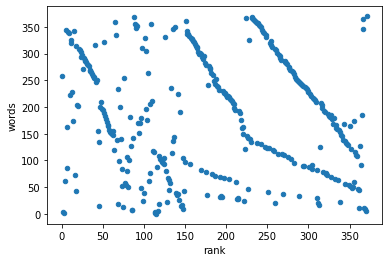

In [ ]:
df_vocab1.plot.scatter(x='rank',y='words') #ahora bien aqui me di cuenta de algo, quizas es porque no se han quitado las stopwords pero realmente no hay una correlacion entre los rangos y las palabras 
#ojo, 'words' es el equivalente a frecuency, no entiendo porque pero al momento de devolver el dataframe resultante asi me los "categorizó", words como numeros y frecuency como palabras

In [ ]:
#luego aplicamos la funcion logaritmo a cada rango de apariciones del resultado anterior:
df_vocab1['log_rank'] = df_vocab1['rank'].apply(np.log)
#df_vocab2['log_rank'] = df_vocab2['rank'].apply(np.log)
df_vocab3['log_rank'] = df_vocab3['rank'].apply(np.log)
df_vocab4['log_rank'] = df_vocab4['rank'].apply(np.log)

In [ ]:
#en este punto seguia hacer lo mismo para la frecuencia, pero me encontre con el error de "'list' object has no atribute 'log'"
#del mismo modo para cada frecuencia, que en este caso seran 'words' por la forma en como me acomodo el dataframe:
df_vocab1['log_frecuency'] = df_vocab1['words'].apply(np.log)
#df_vocab2['log_frecuency'] = df_vocab2['words'].apply(np.log)
df_vocab3['log_frecuency'] = df_vocab3['words'].apply(np.log)
df_vocab4['log_frecuency'] = df_vocab4['words'].apply(np.log)

In [ ]:
#veamos el df del pdf1
df_vocab1

rank  words                                          frecuency  log_rank  \
0       1    259  [zsa, i s a a c a s i m o v s b o o k o f s c ...  0.000000   
1       2      3  [xvl, that events proceed accordirg to probabi...  0.693147   
2       3      1  [xiv, foreword, managed to do in two lines of ...  1.098612   
3       4     62  [uter science, 14 13 all kinds of misrakes in ...  1.386294   
4       5    344  [up the bitch y w ere fain to hold by the neck...  1.609438   
..    ...    ...                                                ...       ...   
366   367    347                                                 []  5.905362   
367   368     11                                                 []  5.908083   
368   369      9                                                 []  5.910797   
369   370      5                                                 []  5.913503   
370   371    370                                                 []  5.916202   

     log_frecuency  
0         5.556828  
1         1.098612  
2         0.000000  
3         4.127134  
4         5.840642  
..             ...  
366       5.849325  
367       2.397895  
368       2.197225  
369       1.609438  
370       5.913503  

[371 rows x 5 columns]

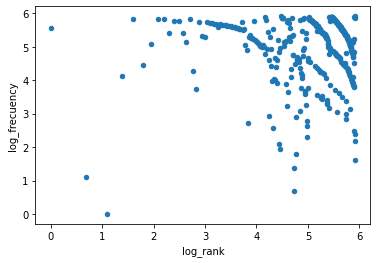

In [ ]:
df_vocab1.plot.scatter(x='log_rank',y='log_frecuency')

Hagamos el ajuste por minimos cuadrados:

In [ ]:
#para el pdf1
Xn1 = df_vocab1['log_rank'].to_list()
Yn1 = df_vocab1['log_frecuency'].to_list()

#para el pdf2
#Xn2 = df_vocab2['log_rank'].to_list()
#Yn2 = df_vocab2['log_frecuency'].to_list()

#para el pdf3
Xn3 = df_vocab3['log_rank'].to_list()
Yn3 = df_vocab3['log_frecuency'].to_list()

#para el pdf4
Xn4 = df_vocab4['log_rank'].to_list()
Yn4 = df_vocab4['log_frecuency'].to_list()

In [ ]:
#definamos las matrices correspondientes al ajuste:
A1 = np.zeros((len(Xn1),2))
Y1 = np.zeros((1,len(Xn1)))

#A2 = np.zeros((len(Xn2),2))
#Y2 = np.zeros((1,len(Xn2)))

A3 = np.zeros((len(Xn3),2))
Y3 = np.zeros((1,len(Xn3)))

A4 = np.zeros((len(Xn4),2))
Y4 = np.zeros((1,len(Xn4)))

#e inicializamos un ciclo for para calcular a la matriz correspondiente:
for j in range(len(Xn1)):
    A1[j,0] = Xn1[j]
    A1[j,1] = 1     #para 1
    Y1[0,j] = Yn1[j]

#for j in range(len(Xn2)):
#    A2[j,0] = Xn2[j]
#    A2[j,1] = 1      #para 2
#    Y2[0,j] = Yn2[j]





    

In [ ]:
for j in range(len(Xn3)):
    A3[j,0] = Xn3[j]
    A3[j,1] = 1
    Y3[0,j] = Yn3[j]
    

In [ ]:
for j in range(len(Xn4)):
    A4[j,0] = Xn4[j]
    A4[j,1] = 1
    Y4[0,j] = Yn4[j]
    

In [ ]:
#nuestros resultados seran los productos de cada matriz A_i anteriores:
result_matriz1 = np.dot(np.transpose(A1),A1)
#result_matriz2 = np.dot(np.transpose(A2),A2)
result_matriz3 = np.dot(np.transpose(A3),A3)
result_matriz4 = np.dot(np.transpose(A4),A4)

In [ ]:
#el calculo de la matriz total quedara:
total_matriz1 = np.dot(np.linalg.inv(result_matriz1),np.transpose(A1))
#total_matriz2 = np.dot(np.linalg.inv(result_matriz2),np.transpose(A2))
total_matriz3 = np.dot(np.linalg.inv(result_matriz3),np.transpose(A3))
total_matriz4 = np.dot(np.linalg.inv(result_matriz4),np.transpose(A4))


In [ ]:
#ahora calculemos el vector minimo correspondiente a cada uno de los pdfs
vector_minimo1 = np.dot(total_matriz1,np.transpose(Y1))
#vector_minimo2 = np.dot(total_matriz2,np.transpose(Y2))
vector_minimo3 = np.dot(total_matriz3,np.transpose(Y3))
vector_minimo4 = np.dot(total_matriz4,np.transpose(Y4))

In [ ]:
#luego llamamos al vector minimo como 'prediccion' en el dataframe
df_vocab1['prediccion'] = df_vocab1['log_rank'].apply(lambda log_rank: log_rank*vector_minimo1[0][0]+vector_minimo1[1][0])

In [ ]:
#y lo ponemos con una funcion lambda
df_vocab1['prediccion'] = df_vocab1['log_rank'].apply(lambda x: x*vector_minimo1[0][0]+vector_minimo1[1][0])

In [ ]:
import matplotlib.pyplot as plt

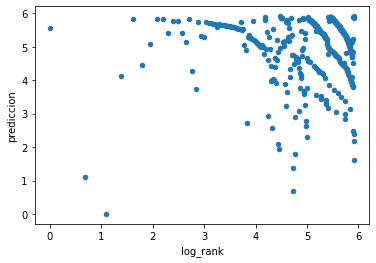

In [ ]:
#para finalmente graficar nuestro resultado, lo cual es curioso, se obtiene para el caso 1 el mismo resultado
ax = df_vocab1.plot.scatter(x='log_rank',y='log_frecuency')
df_vocab1.plot.scatter(x='log_rank',y='prediccion',color='r',ax=ax)
plt.show()

Esto es extraño, puesto que se realizó el mismo algoritmo visto en clase, sin embargo todo parece estar dentro del calculo de vectores minimos, ya que al revisar dicho resultado, se obtiene lo siguiente:

In [ ]:
vector_minimo1

array([[ inf],
       [-inf]])

In [ ]:
vector_minimo3

array([[-inf],
       [ inf]])

In [ ]:
vector_minimo4

array([[-inf],
       [ inf]])

Mi hipótesis es que se debe a que ninguno está definido dado que no se han quitado espacios, más allá de que se hayan intercambiado las columnas, pero quedaré atento a cualquier revisión

In [ ]:
#df_lematizador1[df_lematizador1.columns[:-2]].to_csv('el_texto_procesado_lematizado1.csv',index=False)

In [ ]:
#df_lema1 = pd.read_csv('el_texto_procesado_lematizado1.csv').rename(columns={'parrafos':'final_text'})

In [ ]:
#df_lema1

# Ejercicio 5

Los mismo para el ejercicio anterior, pero usando los dataframes resultantes del
ejercicio 3. ¿Para un mismo pdf, pero distinto stem o lematizador se obtuvo el
mismo exponente? DIscuta los resultados obtenidos.

In [ ]:
#hagamos caso por caso:
df_vocab_porter1 = pd.DataFrame([dictionary_freq_words_porter1]).transpose().reset_index().rename(columns={'index':'words',0:'frecuency'})

In [ ]:
df_vocab_lancaster1 = pd.DataFrame([dictionary_freq_words_lancaster1]).transpose().reset_index().rename(columns={'index':'words',0:'frecuency'})
df_vocab_lematizador1 = pd.DataFrame([dictionary_freq_words_lematizador1]).transpose().reset_index().rename(columns={'index':'words',0:'frecuency'})

In [ ]:
#ahora para los otros 2 pdf's ya no considero el 2 porque no encontre como tratarlo luego de limpiarlo usando regex
df_vocab_porter3 = pd.DataFrame([dictionary_freq_words_porter3]).transpose().reset_index().rename(columns={'index':'words',0:'frecuency'})
df_vocab_lancaster3 = pd.DataFrame([dictionary_freq_words_lancaster3]).transpose().reset_index().rename(columns={'index':'words',0:'frecuency'})
df_vocab_lematizador3 = pd.DataFrame([dictionary_freq_words_lematizador3]).transpose().reset_index().rename(columns={'index':'words',0:'frecuency'})

df_vocab_porter4 = pd.DataFrame([dictionary_freq_words_porter4]).transpose().reset_index().rename(columns={'index':'words',0:'frecuency'})
df_vocab_lancaster4 = pd.DataFrame([dictionary_freq_words_lancaster4]).transpose().reset_index().rename(columns={'index':'words',0:'frecuency'})
df_vocab_lematizador4 = pd.DataFrame([dictionary_freq_words_lematizador4]).transpose().reset_index().rename(columns={'index':'words',0:'frecuency'})

In [ ]:
#ahora cambiamos a cada estructura anterior siguiendo lo que se vio en clase:
df_vocab_porter1 = df_vocab_porter1.sort_values('frecuency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'rank'})
df_vocab_lancaster1 = df_vocab_lancaster1.sort_values('frecuency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'rank'})
df_vocab_lematizador1 = df_vocab_lematizador1.sort_values('frecuency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'rank'})

df_vocab_porter3 = df_vocab_porter3.sort_values('frecuency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'rank'})
df_vocab_lancaster3 = df_vocab_lancaster3.sort_values('frecuency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'rank'})
df_vocab_lematizador3 = df_vocab_lematizador3.sort_values('frecuency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'rank'})

df_vocab_porter4 = df_vocab_porter4.sort_values('frecuency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'rank'})
df_vocab_lancaster4 = df_vocab_lancaster4.sort_values('frecuency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'rank'})
df_vocab_lematizador4 = df_vocab_lematizador4.sort_values('frecuency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'rank'})


In [ ]:
#aplicamos un rango:
df_vocab_porter1['rank'] = df_vocab_porter1['rank'].apply(lambda x: x+1)
df_vocab_lancaster1['rank'] = df_vocab_lancaster1['rank'].apply(lambda x: x+1)
df_vocab_lematizador1['rank'] = df_vocab_lematizador1['rank'].apply(lambda x: x+1)

In [ ]:
df_vocab_porter3['rank'] = df_vocab_porter3['rank'].apply(lambda x: x+1)
df_vocab_lancaster3['rank'] = df_vocab_lancaster3['rank'].apply(lambda x: x+1)
df_vocab_lematizador3['rank'] = df_vocab_lematizador3['rank'].apply(lambda x: x+1)

In [ ]:
df_vocab_porter4['rank'] = df_vocab_porter4['rank'].apply(lambda x: x+1)
df_vocab_lancaster4['rank'] = df_vocab_lancaster4['rank'].apply(lambda x: x+1)
df_vocab_lematizador4['rank'] = df_vocab_lematizador4['rank'].apply(lambda x: x+1)

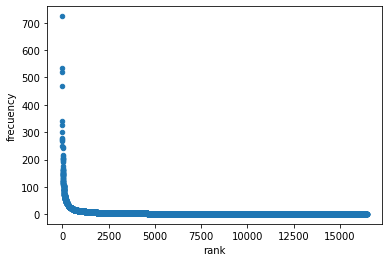

In [ ]:
#por ejemplo con el porter1
df_vocab_porter1.plot.scatter(x='rank',y='frecuency')

In [ ]:
#ahora sí se ve un comportamiento similar al de la clase,  cambiemos escalas_
df_vocab_porter1['log_rank'] = df_vocab_porter1['rank'].apply(np.log)
df_vocab_lancaster1['log_rank'] = df_vocab_lancaster1['rank'].apply(np.log)
df_vocab_lematizador1['log_rank'] = df_vocab_lematizador1['rank'].apply(np.log)

df_vocab_porter3['log_rank'] = df_vocab_porter3['rank'].apply(np.log)
df_vocab_lancaster3['log_rank'] = df_vocab_lancaster3['rank'].apply(np.log)
df_vocab_lematizador3['log_rank'] = df_vocab_lematizador3['rank'].apply(np.log)

df_vocab_porter4['log_rank'] = df_vocab_porter4['rank'].apply(np.log)
df_vocab_lancaster4['log_rank'] = df_vocab_lancaster4['rank'].apply(np.log)
df_vocab_lematizador4['log_rank'] = df_vocab_lematizador4['rank'].apply(np.log)

In [ ]:
#lo mismo para las frecuencias:
df_vocab_porter1['log_frecuency'] = df_vocab_porter1['frecuency'].apply(np.log)
df_vocab_lancaster1['log_frecuency'] = df_vocab_lancaster1['frecuency'].apply(np.log)
df_vocab_lematizador1['log_frecuency'] = df_vocab_lematizador1['frecuency'].apply(np.log)

df_vocab_porter3['log_frecuency'] = df_vocab_porter3['frecuency'].apply(np.log)
df_vocab_lancaster3['log_frecuency'] = df_vocab_lancaster3['frecuency'].apply(np.log)
df_vocab_lematizador3['log_frecuency'] = df_vocab_lematizador3['frecuency'].apply(np.log)

df_vocab_porter4['log_frecuency'] = df_vocab_porter4['frecuency'].apply(np.log)
df_vocab_lancaster4['log_frecuency'] = df_vocab_lancaster4['frecuency'].apply(np.log)
df_vocab_lematizador4['log_frecuency'] = df_vocab_lematizador4['frecuency'].apply(np.log)



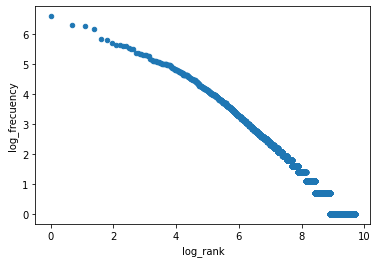

In [ ]:
#revisando para el porter1 con las nuevas escalas:
df_vocab_porter1.plot.scatter(x='log_rank',y='log_frecuency')

Hagamos el ajuste con mínimos cuadrados nuevamente como en el ejercicio anterior:

In [ ]:
Xn_p1 = df_vocab_porter1['log_rank'].to_list() #para porter1
Yn_p1 = df_vocab_porter1['log_frecuency'].to_list()
Xn_l1 = df_vocab_lancaster1['log_rank'].to_list() #para lancaster1
Yn_l1 = df_vocab_lancaster1['log_frecuency'].to_list()
Xn_lm1 = df_vocab_lematizador1['log_rank'].to_list() #para lematizador1
Yn_lm1 = df_vocab_lematizador1['log_frecuency'].to_list()

Xn_p3 = df_vocab_porter3['log_rank'].to_list() #para porter3
Yn_p3 = df_vocab_porter3['log_frecuency'].to_list()
Xn_l3 = df_vocab_lancaster3['log_rank'].to_list() #para lancaster3
Yn_l3 = df_vocab_lancaster3['log_frecuency'].to_list()
Xn_lm3 = df_vocab_lematizador3['log_rank'].to_list() #para lematizador3
Yn_lm3 = df_vocab_lematizador3['log_frecuency'].to_list()

Xn_p4 = df_vocab_porter4['log_rank'].to_list() #para porter4
Yn_p4 = df_vocab_porter4['log_frecuency'].to_list()
Xn_l4 = df_vocab_lancaster4['log_rank'].to_list() #para lancaster4
Yn_l4 = df_vocab_lancaster4['log_frecuency'].to_list()
Xn_lm4 = df_vocab_lematizador4['log_rank'].to_list() #para lematizador4
Yn_lm4 = df_vocab_lematizador4['log_frecuency'].to_list()


In [ ]:
#construimos las matrices, uso la misma notacion de indicies de arriba
A_p1 = np.zeros((len(Xn_p1),2))
Y_p1 = np.zeros((1,len(Xn_p1)))
A_l1 = np.zeros((len(Xn_l1),2))
Y_l1 = np.zeros((1,len(Xn_l1)))
A_lm1 = np.zeros((len(Xn_lm1),2))
Y_lm1 = np.zeros((1,len(Xn_lm1)))

A_p3 = np.zeros((len(Xn_p3),2))
Y_p3 = np.zeros((1,len(Xn_p3)))
A_l3 = np.zeros((len(Xn_l3),2))
Y_l3 = np.zeros((1,len(Xn_l3)))
A_lm3 = np.zeros((len(Xn_lm3),2))
Y_lm3 = np.zeros((1,len(Xn_lm3)))

A_p4 = np.zeros((len(Xn_p4),2))
Y_p4 = np.zeros((1,len(Xn_p4)))
A_l4 = np.zeros((len(Xn_l4),2))
Y_l4 = np.zeros((1,len(Xn_l4)))
A_lm4 = np.zeros((len(Xn_lm4),2))
Y_lm4 = np.zeros((1,len(Xn_lm4)))

In [ ]:
#ahora realizamos los ciclos para cada matriz:
for j in range(len(Xn_p1)):
    A_p1[j,0] = Xn_p1[j]
    A_p1[j,1] = 1
    Y_p1[0,j] = Yn_p1[j]

for j in range(len(Xn_l1)):
    A_l1[j,0] = Xn_l1[j]
    A_l1[j,1] = 1
    Y_l1[0,j] = Yn_l1[j]

for j in range(len(Xn_lm1)):
    A_lm1[j,0] = Xn_lm1[j]
    A_lm1[j,1] = 1
    Y_lm1[0,j] = Yn_lm1[j]

In [ ]:
for j in range(len(Xn_p3)):
    A_p3[j,0] = Xn_p3[j]
    A_p3[j,1] = 1
    Y_p3[0,j] = Yn_p3[j]

for j in range(len(Xn_l3)):
    A_l3[j,0] = Xn_l3[j]
    A_l3[j,1] = 1
    Y_l3[0,j] = Yn_l3[j]

for j in range(len(Xn_lm3)):
    A_lm3[j,0] = Xn_lm3[j]
    A_lm3[j,1] = 1
    Y_lm3[0,j] = Yn_lm3[j]

In [ ]:
for j in range(len(Xn_p4)):
    A_p4[j,0] = Xn_p4[j]
    A_p4[j,1] = 1
    Y_p4[0,j] = Yn_p4[j]

for j in range(len(Xn_l4)):
    A_l4[j,0] = Xn_l4[j]
    A_l4[j,1] = 1
    Y_l4[0,j] = Yn_l4[j]

for j in range(len(Xn_lm4)):
    A_lm4[j,0] = Xn_lm4[j]
    A_lm4[j,1] = 1
    Y_lm4[0,j] = Yn_lm4[j]

In [ ]:
#calculamos los resultados:
result_matriz_p1 = np.dot(np.transpose(A_p1),A_p1)
result_matriz_l1 = np.dot(np.transpose(A_l1),A_l1)
result_matriz_lm1 = np.dot(np.transpose(A_lm1),A_lm1)

result_matriz_p3 = np.dot(np.transpose(A_p3),A_p3)
result_matriz_l3 = np.dot(np.transpose(A_l3),A_l3)
result_matriz_lm3 = np.dot(np.transpose(A_lm3),A_lm3)

result_matriz_p4 = np.dot(np.transpose(A_p4),A_p4)
result_matriz_l4 = np.dot(np.transpose(A_l4),A_l4)
result_matriz_lm4 = np.dot(np.transpose(A_lm4),A_lm4)

In [ ]:
#luego los totales de cada una:
total_matriz_p1 = np.dot(np.linalg.inv(result_matriz_p1),np.transpose(A_p1))
total_matriz_l1 = np.dot(np.linalg.inv(result_matriz_l1),np.transpose(A_l1))
total_matriz_lm1 = np.dot(np.linalg.inv(result_matriz_lm1),np.transpose(A_lm1))

total_matriz_p3 = np.dot(np.linalg.inv(result_matriz_p3),np.transpose(A_p3))
total_matriz_l3 = np.dot(np.linalg.inv(result_matriz_l3),np.transpose(A_l3))
total_matriz_lm3 = np.dot(np.linalg.inv(result_matriz_lm3),np.transpose(A_lm3))

total_matriz_p4 = np.dot(np.linalg.inv(result_matriz_p4),np.transpose(A_p4))
total_matriz_l4 = np.dot(np.linalg.inv(result_matriz_l4),np.transpose(A_l4))
total_matriz_lm4 = np.dot(np.linalg.inv(result_matriz_lm4),np.transpose(A_lm4))

In [ ]:
#ahora con el vector minimo:
vector_minimo_p1 = np.dot(total_matriz_p1,np.transpose(Y_p1))
vector_minimo_l1 = np.dot(total_matriz_l1,np.transpose(Y_l1))
vector_minimo_lm1 = np.dot(total_matriz_lm1,np.transpose(Y_lm1))

vector_minimo_p3 = np.dot(total_matriz_p3,np.transpose(Y_p3))
vector_minimo_l3 = np.dot(total_matriz_l3,np.transpose(Y_l3))
vector_minimo_lm3 = np.dot(total_matriz_lm3,np.transpose(Y_lm3))

vector_minimo_p4 = np.dot(total_matriz_p4,np.transpose(Y_p4))
vector_minimo_l4 = np.dot(total_matriz_l4,np.transpose(Y_l4))
vector_minimo_lm4 = np.dot(total_matriz_lm4,np.transpose(Y_lm4))

In [ ]:
#de este modo podemos calcular los vectores minimos, que en principio no deberian ser infinitos.
print(vector_minimo_p1)
print(vector_minimo_l1)
print(vector_minimo_lm1)


[[-0.93290819]
 [ 8.77658735]]
[[-0.9422354 ]
 [ 8.84929011]]
[[-0.94467468]
 [ 8.8682472 ]]


In [ ]:
#para el pdf3
print(vector_minimo_p3)
print(vector_minimo_l3)
print(vector_minimo_lm3)

[[-0.95141152]
 [ 8.26389407]]
[[-0.96900069]
 [ 8.38453896]]
[[-0.97376164]
 [ 8.41956631]]


In [ ]:
#para el pdf4
print(vector_minimo_p4)
print(vector_minimo_l4)
print(vector_minimo_lm4)

[[-1.0880033 ]
 [ 9.63801842]]
[[-1.10471133]
 [ 9.74682332]]
[[-1.1124138 ]
 [ 9.79946029]]


In [ ]:
#haciendo la transformacion:
df_vocab_porter1['prediccion'] = df_vocab_porter1['log_rank'].apply(lambda log_rank: log_rank*vector_minimo_p1[0][0]+vector_minimo_p1[1][0])
df_vocab_lancaster1['prediccion'] = df_vocab_lancaster1['log_rank'].apply(lambda log_rank: log_rank*vector_minimo_l1[0][0]+vector_minimo_l1[1][0])
df_vocab_lematizador1['prediccion'] = df_vocab_lematizador1['log_rank'].apply(lambda log_rank: log_rank*vector_minimo_lm1[0][0]+vector_minimo_lm1[1][0])

df_vocab_porter3['prediccion'] = df_vocab_porter3['log_rank'].apply(lambda log_rank: log_rank*vector_minimo_p3[0][0]+vector_minimo_p3[1][0])
df_vocab_lancaster3['prediccion'] = df_vocab_lancaster3['log_rank'].apply(lambda log_rank: log_rank*vector_minimo_l3[0][0]+vector_minimo_l3[1][0])
df_vocab_lematizador3['prediccion'] = df_vocab_lematizador4['log_rank'].apply(lambda log_rank: log_rank*vector_minimo_lm3[0][0]+vector_minimo_lm3[1][0])


df_vocab_porter4['prediccion'] = df_vocab_porter4['log_rank'].apply(lambda log_rank: log_rank*vector_minimo_p4[0][0]+vector_minimo_p4[1][0])
df_vocab_lancaster4['prediccion'] = df_vocab_lancaster4['log_rank'].apply(lambda log_rank: log_rank*vector_minimo_l4[0][0]+vector_minimo_l4[1][0])
df_vocab_lematizador4['prediccion'] = df_vocab_lematizador4['log_rank'].apply(lambda log_rank: log_rank*vector_minimo_lm4[0][0]+vector_minimo_lm4[1][0])


In [ ]:
#haciendo una transformacion mas:
df_vocab_porter1['prediccion'] = df_vocab_porter1['log_rank'].apply(lambda x: x*vector_minimo_p1[0][0]+vector_minimo_p1[1][0])
df_vocab_lancaster1['prediccion'] = df_vocab_lancaster1['log_rank'].apply(lambda x: x*vector_minimo_l1[0][0]+vector_minimo_l1[1][0])
df_vocab_lematizador1['prediccion'] = df_vocab_lematizador1['log_rank'].apply(lambda x: x*vector_minimo_lm1[0][0]+vector_minimo_lm1[1][0])

df_vocab_porter3['prediccion'] = df_vocab_porter3['log_rank'].apply(lambda x: x*vector_minimo_p3[0][0]+vector_minimo_p3[1][0])
df_vocab_lancaster3['prediccion'] = df_vocab_lancaster3['log_rank'].apply(lambda x: x*vector_minimo_l3[0][0]+vector_minimo_l3[1][0])
df_vocab_lematizador3['prediccion'] = df_vocab_lematizador3['log_rank'].apply(lambda x: x*vector_minimo_lm3[0][0]+vector_minimo_lm3[1][0])


df_vocab_porter4['prediccion'] = df_vocab_porter4['log_rank'].apply(lambda x: x*vector_minimo_p4[0][0]+vector_minimo_p4[1][0])
df_vocab_lancaster4['prediccion'] = df_vocab_lancaster4['log_rank'].apply(lambda x: x*vector_minimo_l4[0][0]+vector_minimo_l4[1][0])
df_vocab_lematizador4['prediccion'] = df_vocab_lematizador4['log_rank'].apply(lambda x: x*vector_minimo_lm4[0][0]+vector_minimo_lm4[1][0])



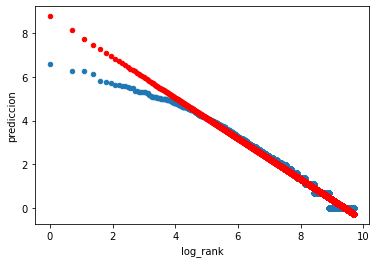

In [ ]:
#y visualizamos para por ejemplo el porter 1
ax = df_vocab_porter1.plot.scatter(x='log_rank',y='log_frecuency')
df_vocab_porter1.plot.scatter(x='log_rank',y='prediccion',color='r',ax=ax)
plt.show()

In [ ]:
#vemos que si bien se logra ajustar para valores rank grandes, en los pequeños presenta fallas: para ello se hace la siguiente transformacion:
df_sample_p1 = df_vocab_porter1.sort_values('log_rank',ascending=False).head(11000)
df_sample_l1 = df_vocab_lancaster1.sort_values('log_rank',ascending=False).head(11000)
df_sample_lm1 = df_vocab_lematizador1.sort_values('log_rank',ascending=False).head(11000)

df_sample_p3 = df_vocab_porter3.sort_values('log_rank',ascending=False).head(11000)
df_sample_l3 = df_vocab_lancaster3.sort_values('log_rank',ascending=False).head(11000)
df_sample_lm3 = df_vocab_lematizador3.sort_values('log_rank',ascending=False).head(11000)

df_sample_p4 = df_vocab_porter4.sort_values('log_rank',ascending=False).head(11000)
df_sample_l4 = df_vocab_lancaster4.sort_values('log_rank',ascending=False).head(11000)
df_sample_lm4 = df_vocab_lematizador4.sort_values('log_rank',ascending=False).head(11000)

In [ ]:
X_sp1 = df_sample_p1['log_rank'].to_list()
Y_sp1 = df_sample_p1['log_frecuency'].to_list()
X_sl1 = df_sample_l1['log_rank'].to_list()
Y_sl1 = df_sample_l1['log_frecuency'].to_list()
X_slm1 = df_sample_lm1['log_rank'].to_list()
Y_slm1 = df_sample_lm1['log_frecuency'].to_list()

X_sp3 = df_sample_p3['log_rank'].to_list()
Y_sp3 = df_sample_p3['log_frecuency'].to_list()
X_sl3 = df_sample_l3['log_rank'].to_list()
Y_sl3 = df_sample_l3['log_frecuency'].to_list()
X_slm3 = df_sample_lm3['log_rank'].to_list()
Y_slm3 = df_sample_lm3['log_frecuency'].to_list()

X_sp4 = df_sample_p4['log_rank'].to_list()
Y_sp4 = df_sample_p4['log_frecuency'].to_list()
X_sl4 = df_sample_l4['log_rank'].to_list()
Y_sl4 = df_sample_l4['log_frecuency'].to_list()
X_slm4 = df_sample_lm4['log_rank'].to_list()
Y_slm4 = df_sample_lm4['log_frecuency'].to_list()



In [ ]:
#luego hacemos esto:
matriz_p1 = np.zeros((len(X_sp1),2))
ABS_p1 = np.zeros((1,len(X_sp1)))

for j in range(len(X_sp1)):
    matriz_p1[j,0] = X_sp1[j]
    matriz_p1[j,1] = 1
    ABS_p1[0,j] = Y_sp1[j]

result_matriz_sp1 = np.dot(np.transpose(matriz_p1),matriz_p1)
total_matriz_sp1 = np.dot(np.linalg.inv(result_matriz_p1),np.transpose(matriz_p1))
vector_minimo_sp1 = np.dot(total_matriz_sp1,np.transpose(ABS_p1))

df_sample_p1['prediccion'] = df_sample_p1['log_rank'].apply(lambda x: x*vector_minimo_p1[0][0]+vector_minimo_p1[1][0])


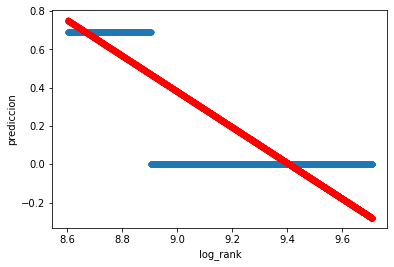

In [ ]:
# y podemos visualizar para esta en particular el porter 1:
ax = df_sample_p1.plot.scatter(x='log_rank',y='log_frecuency')
df_sample_p1.plot.scatter(x='log_rank',y='prediccion',color='r',ax=ax)
plt.show()

Notamos que para el presente porter 1, se redujo considerablemente los valores de logaritmos, ahora podemos calcular el error:

In [ ]:
df_sample_p1['error'] = df_sample_p1.apply(lambda x: (x['log_frecuency']-x['prediccion'])*(x['log_frecuency']-x['prediccion']),axis=1)

In [ ]:
np.sqrt(df_sample_p1['error'].sum())

21.420672757140593

Lo cual nos habla que el error es de 21.4 para porter en el pdf 1, si bien esta parte ya no la pedían la apliqué para un pdf de los 3, el metodo seria analogo para cada uno de los demas métodos.

Los vectores minimos que fueron encontrados con minimos cuadrados nos muestran algo interesante, no son exactamente los mismos según se escoja el método, por ejemplo para el pdf1 se obtuvo:

Con Porter: $$[[-0.93290819] [ 8.77658735]]$$

Con Lancaster: $$[[-0.9422354 ] [ 8.84929011]]$$


Con el Lematizador: $$[[-0.94467468] [ 8.8682472 ]]$$

Para el pdf3 obtuvimos:
Con Porter:
$$
[[-0.95141152]
 [ 8.26389407]]$$
Con Lancaster:
$$
[[-0.96900069]
 [ 8.38453896]]
$$
Con el Lematizador:
$$
[[-0.97376164]
 [ 8.41956631]]
$$

Finalmente con el pdf4 se obtuvo:

Porter:$$[[-1.0880033 ]
 [ 9.63801842]]$$

Lancaster:$$[[-1.10471133]
 [ 9.74682332]]$$


Lematizador:$$[[-1.1124138 ]
 [ 9.79946029]]$$

Lo cual nos habla de un distinto exponente para cada técnica con el mismo pdf.

# Ejercicio 6
Aplique a cada dataframe del ejercicio 3, la vectorización usando Countvector-
izer de sklearn. Recuerde que cada registro dataframe corresponde a un párrafo por lo que el dataframe resultante tiene que tener un vector por cada párrafo.

In [ ]:
#primero hacemos la transformacion vista en la sesion 4 de vectorizacion  para cada dataframe
df_porter1[df_porter1.columns[:-2]].to_csv('el_texto_procesado_porter1.csv',index=False)
df_lancaster1[df_lancaster1.columns[:-2]].to_csv('el_texto_procesado_lancaster1.csv',index=False)
df_lematizador1[df_lematizador1.columns[:-2]].to_csv('el_texto_procesado_lematizado1.csv',index=False)

In [ ]:
df_porter3[df_porter3.columns[:-2]].to_csv('el_texto_procesado_porter3.csv',index=False)
df_lancaster3[df_lancaster3.columns[:-2]].to_csv('el_texto_procesado_lancaster3.csv',index=False)
df_lematizador3[df_lematizador3.columns[:-2]].to_csv('el_texto_procesado_lematizado3.csv',index=False)

In [ ]:
df_porter4[df_porter4.columns[:-2]].to_csv('el_texto_procesado_porter4.csv',index=False)
df_lancaster4[df_lancaster4.columns[:-2]].to_csv('el_texto_procesado_lancaster4.csv',index=False)
df_lematizador4[df_lematizador4.columns[:-2]].to_csv('el_texto_procesado_lematizado4.csv',index=False)

In [ ]:
# luego los cambiamos al final text
df1_1 = pd.read_csv('el_texto_procesado_porter1.csv').rename(columns={'parrafos':'final_text_porter1'})
df1_2 = pd.read_csv('el_texto_procesado_lancaster1.csv').rename(columns={'parrafos':'final_text_lancaster1'})
df1_3 = pd.read_csv('el_texto_procesado_lematizado1.csv').rename(columns={'parrafos':'final_text_lematizado1'})

In [ ]:
df3_1 = pd.read_csv('el_texto_procesado_porter3.csv').rename(columns={'parrafos':'final_text_porter3'})
df3_2 = pd.read_csv('el_texto_procesado_lancaster3.csv').rename(columns={'parrafos':'final_text_lancaster3'})
df3_3 = pd.read_csv('el_texto_procesado_lematizado3.csv').rename(columns={'parrafos':'final_text_lematizado3'})

In [ ]:
df4_1 = pd.read_csv('el_texto_procesado_porter4.csv').rename(columns={'parrafos':'final_text_porter4'})
df4_2 = pd.read_csv('el_texto_procesado_lancaster4.csv').rename(columns={'parrafos':'final_text_lancaster4'})
df4_3 = pd.read_csv('el_texto_procesado_lematizado4.csv').rename(columns={'parrafos':'final_text_lematizado4'})

In [ ]:
# luego aplicamos esta funcion lambda para cada df
df1_1 = df1_1[df1_1['final_text_porter1'].apply(lambda x: True if type(x)==str else False)]
df1_1['senteces_in_tokens'] = df1_1['final_text_porter1'].apply(lambda x: x.split())
df1_2 = df1_2[df1_2['final_text_lancaster1'].apply(lambda x: True if type(x)==str else False)]
df1_2['senteces_in_tokens'] = df1_2['final_text_lancaster1'].apply(lambda x: x.split())
#df1_3 = df1_3[df1_3['final_text_lematizado1'].apply(lambda x: True if type(x)==str else False)]
#df1_3['senteces_in_tokens'] = df1_3['final_text_lematizado1'].apply(lambda x: x.split())

df3_1 = df3_1[df3_1['final_text_porter3'].apply(lambda x: True if type(x)==str else False)]
df3_1['senteces_in_tokens'] = df3_1['final_text_porter3'].apply(lambda x: x.split())

df3_2 = df3_2[df3_2['final_text_lancaster3'].apply(lambda x: True if type(x)==str else False)]
df3_2['senteces_in_tokens'] = df3_2['final_text_lancaster3'].apply(lambda x: x.split())

df3_3 = df3_3[df3_3['final_text_lematizado3'].apply(lambda x: True if type(x)==str else False)]
df3_3['senteces_in_tokens'] = df3_3['final_text_lematizado3'].apply(lambda x: x.split())

df4_1 = df4_1[df4_1['final_text_porter4'].apply(lambda x: True if type(x)==str else False)]
df4_1['senteces_in_tokens'] = df4_1['final_text_porter4'].apply(lambda x: x.split())

df4_2 = df4_2[df4_2['final_text_lancaster4'].apply(lambda x: True if type(x)==str else False)]
df4_2['senteces_in_tokens'] = df4_2['final_text_lancaster4'].apply(lambda x: x.split())

df4_3 = df4_3[df4_3['final_text_lematizado4'].apply(lambda x: True if type(x)==str else False)]
df4_3['senteces_in_tokens'] = df4_3['final_text_lematizado4'].apply(lambda x: x.split())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

In [ ]:
#por alguna razon el lematizado1 no lo quiso correr, ahora importamos de sklearn el count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
#tambien importamos numpy
import numpy as np

In [ ]:
#definimos nuestros corpus de cada df como listas
corpus1_1 = df1_1['final_text_porter1'].to_list()
corpus1_2 = df1_2['final_text_lancaster1'].to_list()
#corpus1_3 = df1_3['final_text_lematizado1'].to_list()

corpus3_1 = df3_1['final_text_porter3'].to_list()
corpus3_2 = df3_2['final_text_lancaster3'].to_list()
corpus3_3 = df3_3['final_text_lematizado3'].to_list()

corpus4_1 = df4_1['final_text_porter4'].to_list()
corpus4_2 = df4_2['final_text_lancaster4'].to_list()
corpus4_3 = df4_3['final_text_lematizado4'].to_list()

In [ ]:
#definimos los vectores para cada corpus 
vectorizer1_1 = CountVectorizer()
vectorizer1_1.fit(corpus1_1)
vectorizer1_2 = CountVectorizer()
vectorizer1_2.fit(corpus1_2)
#vectorizer1_3 = CountVectorizer()
#vectorizer1_3.fit(corpus1_3)

vectorizer3_1 = CountVectorizer()
vectorizer3_1.fit(corpus3_1)
vectorizer3_2 = CountVectorizer()
vectorizer3_2.fit(corpus3_2)
vectorizer3_3 = CountVectorizer()
vectorizer3_3.fit(corpus3_3)

vectorizer4_1 = CountVectorizer()
vectorizer4_1.fit(corpus4_1)
vectorizer4_2 = CountVectorizer()
vectorizer4_2.fit(corpus4_2)
vectorizer4_3 = CountVectorizer()
vectorizer4_3.fit(corpus4_3)




CountVectorizer()

In [ ]:
#finalmente volvemos a crear un dataframe para visualizar el countvectorizer en cada corpus
df1_1['CountVectorizer'] = df1_1['final_text_porter1'].apply(lambda x: np.array(vectorizer1_1.transform([x]).todense())[0])
df1_2['CountVectorizer'] = df1_2['final_text_lancaster1'].apply(lambda x: np.array(vectorizer1_2.transform([x]).todense())[0])
#df1_3['CountVectorizer'] = df1_3['final_text_lematizado1'].apply(lambda x: np.array(vectorizer1_3.transform([x]).todense())[0])

df3_1['CountVectorizer'] = df3_1['final_text_porter3'].apply(lambda x: np.array(vectorizer3_1.transform([x]).todense())[0])
df3_2['CountVectorizer'] = df3_2['final_text_lancaster3'].apply(lambda x: np.array(vectorizer3_2.transform([x]).todense())[0])
df3_3['CountVectorizer'] = df3_3['final_text_lematizado3'].apply(lambda x: np.array(vectorizer3_3.transform([x]).todense())[0])

df4_1['CountVectorizer'] = df4_1['final_text_porter4'].apply(lambda x: np.array(vectorizer4_1.transform([x]).todense())[0])
df4_2['CountVectorizer'] = df4_2['final_text_lancaster4'].apply(lambda x: np.array(vectorizer4_2.transform([x]).todense())[0])
df4_3['CountVectorizer'] = df4_3['final_text_lematizado4'].apply(lambda x: np.array(vectorizer4_3.transform([x]).todense())[0])


In [ ]:
#y en base a lo anterior podriamos ver el dataframe, digamos el dataframe 3 con la tecnica 2
df3_2

final_text_lancaster3  \
0                                8 convergence chica 47   
1                                   9 conflict chica 53   
2                           10 interpretation events 60   
3                                    11 mind changed 66   
4                                     12 mind killed 74   
...                                                 ...   
2437  waited street cold stars burning whole galaxy ...   
2438  new earth millions planets far beyond repeated...   
2439                                     grow old along   
2440                                           best yet   
2441                               last life first made   

                                     senteces_in_tokens  \
0                           [8, convergence, chica, 47]   
1                              [9, conflict, chica, 53]   
2                      [10, interpretation, events, 60]   
3                               [11, mind, changed, 66]   
4                                [12, mind, killed, 74]   
...                                                 ...   
2437  [waited, street, cold, stars, burning, whole, ...   
2438  [new, earth, millions, planets, far, beyond, r...   
2439                                 [grow, old, along]   
2440                                        [best, yet]   
2441                          [last, life, first, made]   

                                        CountVectorizer  
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
3     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
4     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...  
...                                                 ...  
2437  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2438  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2439  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2440  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  
2441  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...  

[2418 rows x 3 columns]

In [ ]:
# y en base en esto podemos aplicar para una m en particular 
m = 1000
vector_sentence = list(df3_2['CountVectorizer'].iloc[m])
print(df3_2['final_text_lancaster3'].iloc[m])
print('#######Vectorizador########')
print([(j,vector_sentence[j]) for j in range(len(vector_sentence)) if vector_sentence[j]!=0 ])

turned quickly face white moonlight space slow count ten said nothing outfaced soldiers safe knew thought known
#######Vectorizador########
[(1397, 1), (2294, 1), (3582, 1), (3596, 1), (4080, 1), (4263, 1), (4430, 1), (5016, 1), (5472, 1), (5476, 1), (5826, 1), (5888, 1), (5935, 1), (6420, 1), (6521, 1), (6721, 1), (7152, 1)]


# Ejercicio 7
Haga lo mismo que el ejercicio anterior pero usando TFIDF.

In [ ]:
#Comenzamos con importar de sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#inicializamos el metodo como con counter
vectorizer1_1 = TfidfVectorizer()
vectorizer1_1.fit(corpus1_1) 
vectorizer1_2 = TfidfVectorizer()
vectorizer1_2.fit(corpus1_2) 
#vectorizer1_3 = TfidfVectorizer()
#vectorizer1_3.fit(corpus1_3) 

vectorizer3_1 = TfidfVectorizer()
vectorizer3_1.fit(corpus3_1) 
vectorizer3_2 = TfidfVectorizer()
vectorizer3_2.fit(corpus3_2) 
vectorizer3_3 = TfidfVectorizer()
vectorizer3_3.fit(corpus3_3) 

vectorizer4_1 = TfidfVectorizer()
vectorizer4_1.fit(corpus4_1) 
vectorizer4_2 = TfidfVectorizer()
vectorizer4_2.fit(corpus4_2) 
vectorizer4_3 = TfidfVectorizer()
vectorizer4_3.fit(corpus4_3) 

TfidfVectorizer()

In [ ]:
#luego aplicamos cada funcion al tfidf por cada dataframe que tenemos:
df1_1['TfidfVectorizer'] = df1_1['final_text_porter1'].apply(lambda x: np.array(vectorizer1_1.transform([x]).todense())[0])
df1_2['TfidfVectorizer'] = df1_2['final_text_lancaster1'].apply(lambda x: np.array(vectorizer1_2.transform([x]).todense())[0])
#df1_3['TfidfVectorizer'] = df1_3['final_text_lematizado1'].apply(lambda x: np.array(vectorizer1_3.transform([x]).todense())[0])

df3_1['TfidfVectorizer'] = df3_1['final_text_porter3'].apply(lambda x: np.array(vectorizer3_1.transform([x]).todense())[0])
df3_2['TfidfVectorizer'] = df3_2['final_text_lancaster3'].apply(lambda x: np.array(vectorizer3_2.transform([x]).todense())[0])
df3_3['TfidfVectorizer'] = df3_3['final_text_lematizado3'].apply(lambda x: np.array(vectorizer3_3.transform([x]).todense())[0])

df4_1['TfidfVectorizer'] = df4_1['final_text_porter4'].apply(lambda x: np.array(vectorizer4_1.transform([x]).todense())[0])
df4_2['TfidfVectorizer'] = df4_2['final_text_lancaster4'].apply(lambda x: np.array(vectorizer4_2.transform([x]).todense())[0])
df4_3['TfidfVectorizer'] = df4_3['final_text_lematizado4'].apply(lambda x: np.array(vectorizer4_3.transform([x]).todense())[0])

In [ ]:
#asi podemos ver digamos el mismo dataframe del caso anterior:
df3_2

final_text_lancaster3  \
0                                8 convergence chica 47   
1                                   9 conflict chica 53   
2                           10 interpretation events 60   
3                                    11 mind changed 66   
4                                     12 mind killed 74   
...                                                 ...   
2437  waited street cold stars burning whole galaxy ...   
2438  new earth millions planets far beyond repeated...   
2439                                     grow old along   
2440                                           best yet   
2441                               last life first made   

                                     senteces_in_tokens  \
0                           [8, convergence, chica, 47]   
1                              [9, conflict, chica, 53]   
2                      [10, interpretation, events, 60]   
3                               [11, mind, changed, 66]   
4                                [12, mind, killed, 74]   
...                                                 ...   
2437  [waited, street, cold, stars, burning, whole, ...   
2438  [new, earth, millions, planets, far, beyond, r...   
2439                                 [grow, old, along]   
2440                                        [best, yet]   
2441                          [last, life, first, made]   

                                        CountVectorizer  \
0     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
1     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2     [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
3     [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
4     [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...   
...                                                 ...   
2437  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2438  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2439  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2440  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   
2441  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...   

                                        TfidfVectorizer  
0     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
1     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2     [0.5116667743248662, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
3     [0.0, 0.0, 0.5633056116545437, 0.0, 0.0, 0.0, ...  
4     [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5674960175115...  
...                                                 ...  
2437  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2438  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2439  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2440  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  
2441  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...  

[2418 rows x 4 columns]

In [ ]:
#de hecho si hacemos el mismo caso para la m que usamos en este dataframe tenemos lo siguiente con esta nueva tecnica
m = 1000
vector_sentence = list(df3_2['TfidfVectorizer'].iloc[m])
print(df3_2['final_text_lancaster3'].iloc[m])
print('**********Vectorizado**************')
print([(j,vector_sentence[j]) for j in range(len(vector_sentence)) if vector_sentence[j]!=0 ])


turned quickly face white moonlight space slow count ten said nothing outfaced soldiers safe knew thought known
**********Vectorizado**************
[(1397, 0.3323516071986577), (2294, 0.19075933263131112), (3582, 0.19345153609848748), (3596, 0.22869220004526036), (4080, 0.3323516071986577), (4263, 0.18147112800454593), (4430, 0.3323516071986577), (5016, 0.22120947044517622), (5472, 0.2555302493685895), (5476, 0.11991524202342291), (5826, 0.2662980427236773), (5888, 0.26238638073399195), (5935, 0.23785032092711375), (6420, 0.23584790490981217), (6521, 0.1948668966023092), (6721, 0.1948668966023092), (7152, 0.2303675913270296)]


De aquí, notamos que la primera entrada de cada vector es la misma, sin embargo, para este mismo dataframe y con una m idéntica obtenemos resultados distintos en la segunda entrada de cada vector

# Ejercicio 8
Para cada dataframe obtenido en el ejercicio 3, obtenga el top 5 de las palabras claves de cada párrafo (registro). Compare las palabras claves obtenidas para
distintas técnicas de stem y lematización pero provenientes del mismo pdf.

#### con el pdf1

In [ ]:
#recordemos que cada dataframe fue guardado a partir de "dictionary_freq_words" usando la funcion counter, una forma de verlos para que sea mas sencillo realizar este ejercicio es usar la siguiente transformacion:
df_vocab_porter1 = pd.DataFrame([dictionary_freq_words_porter1]).transpose().reset_index().rename(columns={0:'frecuency','index':'word'})

In [ ]:
#con esta funcion lo que hago es que se tome aquelllas palabras que tengan longitud mayor a cero, las ordene por frecuencia en orden descendiente y me de las 5 primeras palabras de este metodo porter para el pdf 1
df_vocab_porter1[df_vocab_porter1['word'].apply(lambda x: len(x))>0].sort_values('frecuency',ascending=False).head(5)

word  frecuency
1260  american        724
1030   english        535
469    science        520
391          1        470
13         one        341

In [ ]:
#hagamos lo mismo para los otros metodos en este pdf
df_vocab_lancaster1 = pd.DataFrame([dictionary_freq_words_lancaster1]).transpose().reset_index().rename(columns={0:'frecuency','index':'word'})
df_vocab_lancaster1[df_vocab_lancaster1['word'].apply(lambda x: len(x))>0].sort_values('frecuency',ascending=False).head(5)

word  frecuency
1248  american        720
464    science        556
1017   english        535
388          1        469
13         one        357

In [ ]:
df_vocab_lematizador1 = pd.DataFrame([dictionary_freq_words_lematizador1]).transpose().reset_index().rename(columns={0:'frecuency','index':'word'})
df_vocab_lematizador1[df_vocab_lematizador1['word'].apply(lambda x: len(x))>0].sort_values('frecuency',ascending=False).head(5)

word  frecuency
1246  american        724
463    science        563
1014   english        535
387          1        469
13         one        357

De aquí, podemos ver que "american" es la palabra más usada en el pdf 1, sin embargo el Lancaster solo la encontró 720 veces, mientras que los demás la encontraron 724 ocasiones

#### con el pdf3

In [ ]:
df_vocab_porter3 = pd.DataFrame([dictionary_freq_words_porter3]).transpose().reset_index().rename(columns={0:'frecuency','index':'word'})
df_vocab_porter3[df_vocab_porter3['word'].apply(lambda x: len(x))>0].sort_values('frecuency',ascending=False).head(5)

word  frecuency
1067  arvardan        366
328       said        365
67    schwartz        344
79       would        274
164      could        249

In [ ]:
df_vocab_lancaster3 = pd.DataFrame([dictionary_freq_words_lancaster3]).transpose().reset_index().rename(columns={0:'frecuency','index':'word'})
df_vocab_lancaster3[df_vocab_lancaster3['word'].apply(lambda x: len(x))>0].sort_values('frecuency',ascending=False).head(5)

word  frecuency
326       said        365
1056  arvardan        363
67    schwartz        344
79       would        274
163      could        249

In [ ]:
df_vocab_lematizador3 = pd.DataFrame([dictionary_freq_words_lematizador3]).transpose().reset_index().rename(columns={0:'frecuency','index':'word'})
df_vocab_lematizador3[df_vocab_lematizador3['word'].apply(lambda x: len(x))>0].sort_values('frecuency',ascending=False).head(5)

word  frecuency
1048  arvardan        366
326       said        365
67    schwartz        344
79       would        274
163      could        249

En este caso, "arvardan" es la más usada según el Porter y el Lematizador, pero Lancaster dice que "said" es la más usada, eso sí, en los 3 casos, "said" presenta una frecuencia de 365 veces

#### Con el pdf 4

In [ ]:
df_vocab_porter4 = pd.DataFrame([dictionary_freq_words_porter4]).transpose().reset_index().rename(columns={0:'frecuency','index':'word'})
df_vocab_porter4[df_vocab_porter4['word'].apply(lambda x: len(x))>0].sort_values('frecuency',ascending=False).head(5)

word  frecuency
11   seldon       1064
82     said        889
115   would        680
46      one        454
185   raych        403

In [ ]:
df_vocab_lancaster4 = pd.DataFrame([dictionary_freq_words_lancaster4]).transpose().reset_index().rename(columns={0:'frecuency','index':'word'})
df_vocab_lancaster4[df_vocab_lancaster4['word'].apply(lambda x: len(x))>0].sort_values('frecuency',ascending=False).head(5)

word  frecuency
11   seldon       1064
82     said        889
116   would        680
46      one        472
186   raych        403

In [ ]:
df_vocab_lematizador4 = pd.DataFrame([dictionary_freq_words_lematizador4]).transpose().reset_index().rename(columns={0:'frecuency','index':'word'})
df_vocab_lematizador4[df_vocab_lematizador4['word'].apply(lambda x: len(x))>0].sort_values('frecuency',ascending=False).head(5)

word  frecuency
11   seldon       1064
82     said        889
116   would        680
46      one        473
186   raych        403

Curiosamente, en este último pdf las palabras mantienen el mismo ranking entre sí, además de que, únicamente con "one" se presentan discrepancias en cuanto las veces que aparecen, siendo Porter la que menos la encontró, lo cual es muy interesante, puesto que en este caso, los resultados son prácticamente idénticos

# Ejercicio 9 BONUS

## Lema 1
Demuestre que: 
$$
\langle AX , Y \rangle = \langle X, A^{T} Y ⟩
$$

####Demostración:
Dado que, en general:

$$
\langle a , b \rangle = \sum_{i = 1}^n a_i b_i
$$


Tenemos que:
$$
\langle AX , Y \rangle  = \sum_{i = 1}^n \sum_{j = 1}^m a_{ij}x_{j} y_{i}
$$

$$
= \sum_{j = 1}^m \sum_{i = 1}^n a_{ij}y_{i}x_{j}
$$

Como A es cuadrada, se tiene que $a_{ij}=a_{ji}$, entonces:

$$
\sum_{j = 1}^m \sum_{i = 1}^n a_{ij}y_{i}x_{j} = \sum_{j = 1}^m \sum_{i = 1}^n a_{ji}y_{i}x_{j} =  \sum_{j = 1}^m \sum_{i = 1}^n x_{j}a_{ji}y_{i}
$$
$$
=  \langle X, A^{T} Y ⟩
$$

Por lo que:

$$
\langle AX , Y \rangle = \langle X, A^{T} Y ⟩
$$

## Lema 2:
$$
rango(A^{T} A ) = rango(A)
$$

#### Demostración:
Sea $$\beta_1=[e_1,e_2,...,e_n]$$ una base para la matriz A, entonces $\beta$ genera a A y por lo tando: $$dim (A) = n$$ lo que implica que $$rango(A) = n$$

Del mismo modo, si tomamos $$\beta_2=[e_1',e_2',...,e_n']$$
una base para $A^{T}$ se tiene que esta genera a $A^{T}$ y por lo tanto $$dim(A^T)=n$$ implicando que:
$$
rango(A^T) = n
$$

Por lo que, si multiplicamos ambas matrices, tenemos lo siguiente:
$$
 A^T A\in M_{m,n} => 0 \leq rango(A^T A)\leq min(n,m) = min(n,n)
$$
esto pues $m=n$, pero se tiene que $$ min(n,n) = n$$ por lo que:
$$
rango(A^T A) = n = rango(A)
$$
es decir:
$$rango(A^{T} A ) = rango(A)$$

## Corolario
Si A es una matriz de $m \times n$  tal que $rango(A)=n$ entonces $A^T A$ es una matriz invertible

### Demostración
Dado que $A\in M_{m,n}$, tomemos $A^T \in M_{m,n}$, tenemos que:
$$
A^T A = \sum_{k = 1}^{n} a_{ki}a_{ik}  
$$

dado que $rango(A)= n$ , se tiene que $a_{ki}=0$ con $k=\not i$, por lo que:
$$
A^T A = a_{ii}a_{ik}
$$

hagamos $a_{ik} = 1/a_{ii}$ para todo $i\in [1,2,...,n] $, entonces, al hacer eso tenemos que:
$$
A^T A = a_{ii}(1/a_{ii}) = I_d
$$

Análogamente, se tiene que:

$$
A A^T = a_{ii}(1/a_{ii}) = I_d
$$

De esta forma, hemos mostrado que $A^T A $ es una matriz invertible



## Proposición:
Si A es una matriz de $m\times n$ tal que $rango(A)=n$ entonces existe un $X_0$ tal que:
$$
(A^T A)^{-1} A^T  Y = X_0
$$

y además:
$$
||Y-AX_0||\leq ||Y-AX||
$$

### Demostración:
Tenemos que, por el corolario:
$$
(A^T A) = I_d = (A^T A) ^{-1}
$$

por otra parte, sabemos que:

$$
AX = Y
$$

multiplicando ambos lados por $A^T$ sin afectar la igualdad anterior tenemos:


$$
A^T AX = A^T Y
$$

Sea $X_0 = A^T A X$ entonces, la igualdad anterior nos queda:

$$
A^T Y = X_0
$$

La cual, sin perdida de generalidad puede ser vista como:
$$
A^T Y =  I_d A^T Y = (A^T A)A^T Y = (A^T A)^{-1} A^T Y = X_0
$$

de esta forma:

$$
 (A^T A)^{-1} A^T Y = X_0
$$

Finalmente, tenemos que:

$$
|| Y - A X_0 || = \sqrt{\langle Y- A X_0,Y- A X_0\rangle }
$$

$$
= \sqrt{\langle Y- A(A^T A X),Y- A(A^T A X)\rangle}
$$

$$
= \sqrt{\langle Y- (AA^T) (A X),Y- (AA^T) (A X)\rangle}
$$

$$
\leq  \sqrt{\langle Y- A X,Y- A X\rangle}
$$

$$
= || Y-AX||
$$

así, se tiene que:
$$
|| Y - A X_0 || \leq  || Y-AX||
$$

que es lo que nos pedían probar